## Data analysis and visualization of full ensemble simulations across the gradient

By Bin Wang([@bioatmo_spere](https://twitter.com/bioatmo_sphere)|wbwenwu@gmail.com)

06/09/2021

---

Full reciprocal simulation with an ensemble of 20 runs for each "treatment".

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

print("pandas version:", pd.__version__)
print('numpy version:',  np.__version__)
print("scipy version:",scipy.__version__)
print('matplotlib version:',  matplotlib.__version__)

pandas version: 1.2.2
numpy version: 1.19.2
scipy version: 1.6.2
matplotlib version: 3.3.4


In [2]:
def confi_interval(df, alpha=0.05):
    #alpha = 0.20
    
    lower = df.apply(
        lambda df: df.mean() - (stats.t.ppf(1 - alpha/2, df.count()-1) * df.std(ddof=1)/np.sqrt(df.count())),axis=1
    )
    upper = df.apply(lambda df: df.mean() + (stats.t.ppf(1 - alpha/2, df.count()-1) * df.std(ddof=1)/np.sqrt(df.count())),axis=1)
    
    return lower,upper

### Desert at different sites

In [4]:
sub_de_de = pd.read_csv('desert/Sub_desert_desert.csv',   index_col=0)/10000
sub_de_sc = pd.read_csv('desert/Sub_desert_scrubland.csv',index_col=0)/10000
sub_de_gr = pd.read_csv('desert/Sub_desert_grassland.csv',index_col=0)/10000
sub_de_pi = pd.read_csv('desert/Sub_desert_pineoak.csv',  index_col=0)/10000
sub_de_su = pd.read_csv('desert/Sub_desert_subalpine.csv',index_col=0)/10000

sub_de_de.head()

0          1          2          3          4          5  \
0  317.50658  317.50658  317.50658  317.50658  317.50658  317.50658   
1  317.50745  317.50825  317.50725  317.50705  317.50755  317.50735   
2  317.50252  317.50135  317.50195  317.50158  317.50208  317.50108   
3  317.49060  317.48588  317.49038  317.49028  317.49100  317.48902   
4  317.47262  317.46212  317.47330  317.47255  317.47380  317.47150   

           6          7          8          9         10         11  \
0  317.50658  317.50658  317.50658  317.50658  317.50658  317.50658   
1  317.50728  317.50735  317.50765  317.50845  317.50735  317.50745   
2  317.50308  317.50158  317.50328  317.50358  317.50185  317.50172   
3  317.49512  317.49012  317.49502  317.49285  317.48988  317.48920   
4  317.48260  317.47208  317.48178  317.47750  317.47208  317.47062   

          12         13         14         15         16         17  \
0  317.50658  317.50658  317.50658  317.50658  317.50658  317.50658   
1  317.50725  317.50755  317.50775  317.50725  317.50735  317.50815   
2  317.50160  317.50212  317.50192  317.50320  317.50192  317.50238   
3  317.48965  317.48935  317.49065  317.49322  317.49015  317.49122   
4  317.47220  317.47118  317.47318  317.47775  317.47252  317.47370   

          18         19  
0  317.50658  317.50658  
1  317.50735  317.50795  
2  317.50220  317.50182  
3  317.49125  317.48982  
4  317.47438  317.47212

In [6]:
alpha= 0.05
sub_de_de_bound   = confi_interval(sub_de_de.iloc[:,:],alpha)
sub_de_sc_bound   = confi_interval(sub_de_sc.iloc[:,:],alpha)
sub_de_gr_bound   = confi_interval(sub_de_gr.iloc[:,:],alpha)
sub_de_pi_bound   = confi_interval(sub_de_pi.iloc[:,:],alpha)
sub_de_su_bound   = confi_interval(sub_de_su.iloc[:,:],alpha)

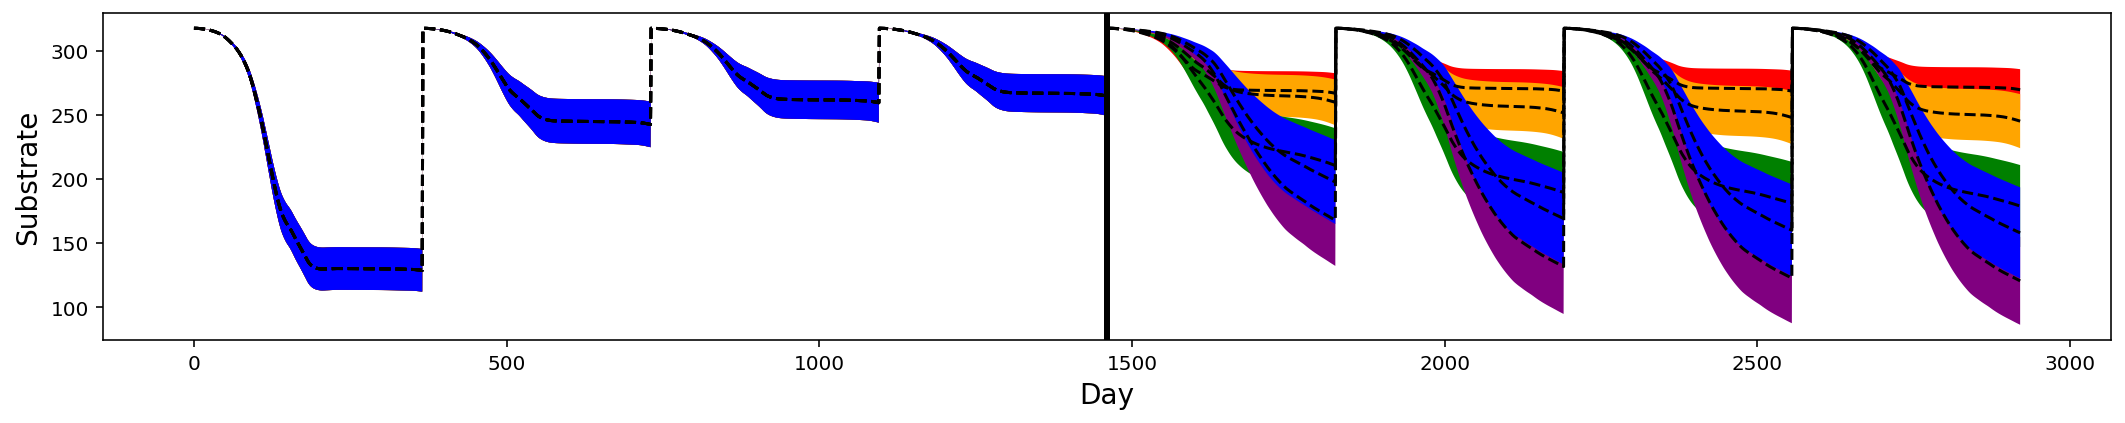

In [7]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*4, color='k',linestyle='-',lw=3)
#ax.axvline(x=365*3, color='k',linestyle='-',lw=3)

ax.plot(sub_de_de.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_de_de.index[:],y1=sub_de_de_bound[0][:],y2=sub_de_de_bound[1][:], facecolor='red',alpha=1.0)

ax.plot(sub_de_sc.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_de_sc.index[:],y1=sub_de_sc_bound[0][:],y2=sub_de_sc_bound[1][:], facecolor='orange',alpha=1.0)

ax.plot(sub_de_gr.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_de_gr.index[:],y1=sub_de_gr_bound[0][:],y2=sub_de_gr_bound[1][:], facecolor='green',alpha=1.0)

ax.plot(sub_de_pi.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_de_pi.index[:],y1=sub_de_pi_bound[0][:],y2=sub_de_pi_bound[1][:], facecolor='purple',alpha=1.0)

ax.plot(sub_de_su.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_de_su.index[:],y1=sub_de_su_bound[0][:],y2=sub_de_su_bound[1][:], facecolor='blue',alpha=1.0)


plt.show()

### Subalpine community at different sites

In [8]:
sub_su_de = pd.read_csv('subalpine/Sub_subalpine_desert.csv',   index_col=0)/10000
sub_su_sc = pd.read_csv('subalpine/Sub_subalpine_scrubland.csv',index_col=0)/10000
sub_su_gr = pd.read_csv('subalpine/Sub_subalpine_grassland.csv',index_col=0)/10000
sub_su_pi = pd.read_csv('subalpine/Sub_subalpine_pineoak.csv',  index_col=0)/10000
sub_su_su = pd.read_csv('subalpine/Sub_subalpine_subalpine.csv',index_col=0)/10000

sub_su_de.head()

0          1          2          3          4          5  \
0  317.50658  317.50658  317.50658  317.50658  317.50658  317.50658   
1  317.50745  317.50825  317.50725  317.50705  317.50755  317.50735   
2  317.50510  317.50475  317.50438  317.50415  317.50452  317.50360   
3  317.49815  317.49578  317.49742  317.49780  317.49800  317.49640   
4  317.48750  317.48172  317.48725  317.48735  317.48768  317.48595   

           6          7          8          9         10         11  \
0  317.50658  317.50658  317.50658  317.50658  317.50658  317.50658   
1  317.50728  317.50735  317.50765  317.50845  317.50735  317.50745   
2  317.50495  317.50400  317.50518  317.50575  317.50455  317.50442   
3  317.50065  317.49745  317.50062  317.49928  317.49790  317.49715   
4  317.49352  317.48645  317.49272  317.49012  317.48775  317.48630   

          12         13         14         15         16         17  \
0  317.50658  317.50658  317.50658  317.50658  317.50658  317.50658   
1  317.50725  317.50755  317.50775  317.50725  317.50735  317.50815   
2  317.50415  317.50482  317.50448  317.50545  317.50428  317.50475   
3  317.49710  317.49725  317.49812  317.49980  317.49720  317.49830   
4  317.48685  317.48668  317.48785  317.49062  317.48650  317.48755   

          18         19  
0  317.50658  317.50658  
1  317.50735  317.50795  
2  317.50462  317.50438  
3  317.49830  317.49732  
4  317.48825  317.48690

In [10]:
alpha= 0.05
sub_su_de_bound   = confi_interval(sub_su_de.iloc[:,:],alpha)
sub_su_sc_bound   = confi_interval(sub_su_sc.iloc[:,:],alpha)
sub_su_gr_bound   = confi_interval(sub_su_gr.iloc[:,:],alpha)
sub_su_pi_bound   = confi_interval(sub_su_pi.iloc[:,:],alpha)
sub_su_su_bound   = confi_interval(sub_su_su.iloc[:,:],alpha)

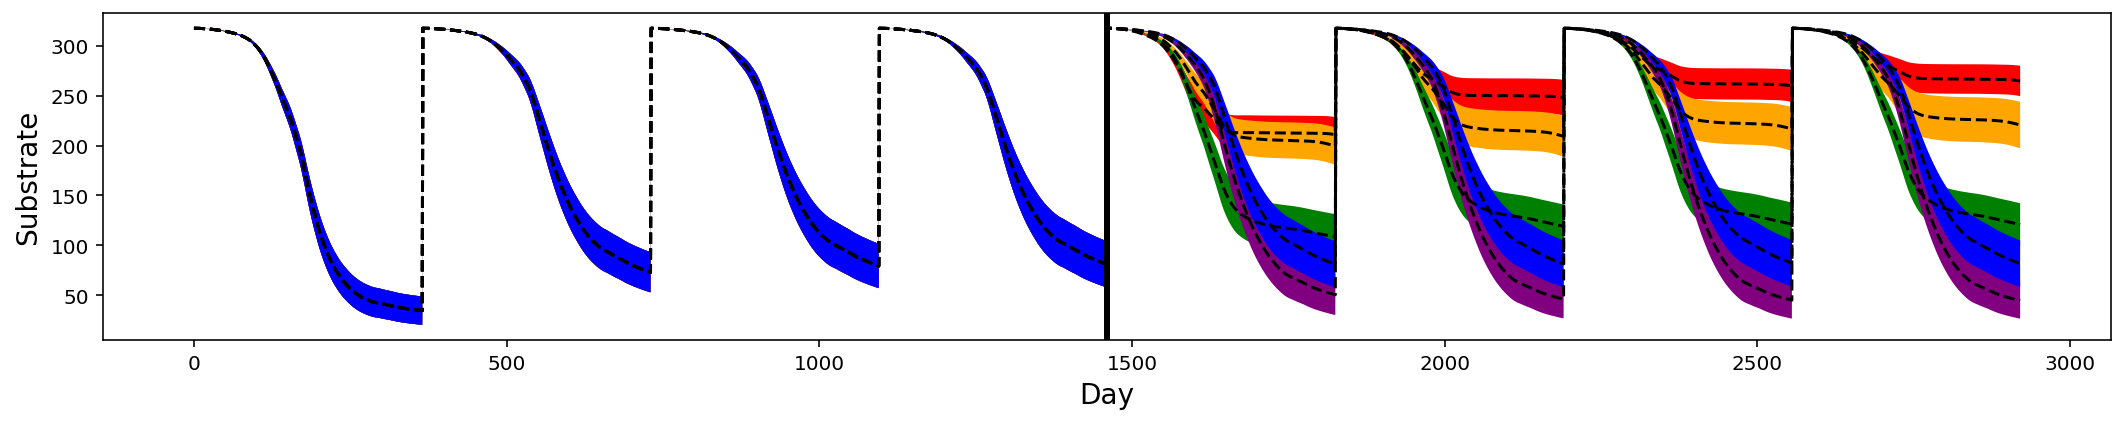

In [11]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*4, color='k',linestyle='-',lw=3)
#ax.axvline(x=365*3, color='k',linestyle='-',lw=3)

ax.plot(sub_su_de.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_su_de.index[:],y1=sub_su_de_bound[0][:],y2=sub_su_de_bound[1][:], facecolor='red',alpha=1.0)

ax.plot(sub_su_sc.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_su_sc.index[:],y1=sub_su_sc_bound[0][:],y2=sub_su_sc_bound[1][:], facecolor='orange',alpha=1.0)

ax.plot(sub_su_gr.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_su_gr.index[:],y1=sub_su_gr_bound[0][:],y2=sub_su_gr_bound[1][:], facecolor='green',alpha=1.0)

ax.plot(sub_su_pi.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_su_pi.index[:],y1=sub_su_pi_bound[0][:],y2=sub_su_pi_bound[1][:], facecolor='purple',alpha=1.0)

ax.plot(sub_su_su.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_su_su.index[:],y1=sub_su_su_bound[0][:],y2=sub_su_su_bound[1][:], facecolor='blue',alpha=1.0)


plt.show()

### decomposition at Desert

In [5]:
sub_de_de = pd.read_csv('desert/Sub_desert_desert.csv',      index_col=0)/10000
sub_sc_de = pd.read_csv('scrubland/Sub_scrubland_desert.csv',index_col=0)/10000
sub_gr_de = pd.read_csv('grassland/Sub_grassland_desert.csv',index_col=0)/10000
sub_pi_de = pd.read_csv('pineoak/Sub_pineoak_desert.csv',    index_col=0)/10000
sub_su_de = pd.read_csv('subalpine/Sub_subalpine_desert.csv',index_col=0)/10000

sub_de_de.head()

0          1          2          3          4          5  \
0  317.50658  317.50658  317.50658  317.50658  317.50658  317.50658   
1  317.50745  317.50825  317.50725  317.50705  317.50755  317.50735   
2  317.50252  317.50135  317.50195  317.50158  317.50208  317.50108   
3  317.49060  317.48588  317.49038  317.49028  317.49100  317.48902   
4  317.47262  317.46212  317.47330  317.47255  317.47380  317.47150   

           6          7          8          9         10         11  \
0  317.50658  317.50658  317.50658  317.50658  317.50658  317.50658   
1  317.50728  317.50735  317.50765  317.50845  317.50735  317.50745   
2  317.50308  317.50158  317.50328  317.50358  317.50185  317.50172   
3  317.49512  317.49012  317.49502  317.49285  317.48988  317.48920   
4  317.48260  317.47208  317.48178  317.47750  317.47208  317.47062   

          12         13         14         15         16         17  \
0  317.50658  317.50658  317.50658  317.50658  317.50658  317.50658   
1  317.50725  317.50755  317.50775  317.50725  317.50735  317.50815   
2  317.50160  317.50212  317.50192  317.50320  317.50192  317.50238   
3  317.48965  317.48935  317.49065  317.49322  317.49015  317.49122   
4  317.47220  317.47118  317.47318  317.47775  317.47252  317.47370   

          18         19  
0  317.50658  317.50658  
1  317.50735  317.50795  
2  317.50220  317.50182  
3  317.49125  317.48982  
4  317.47438  317.47212

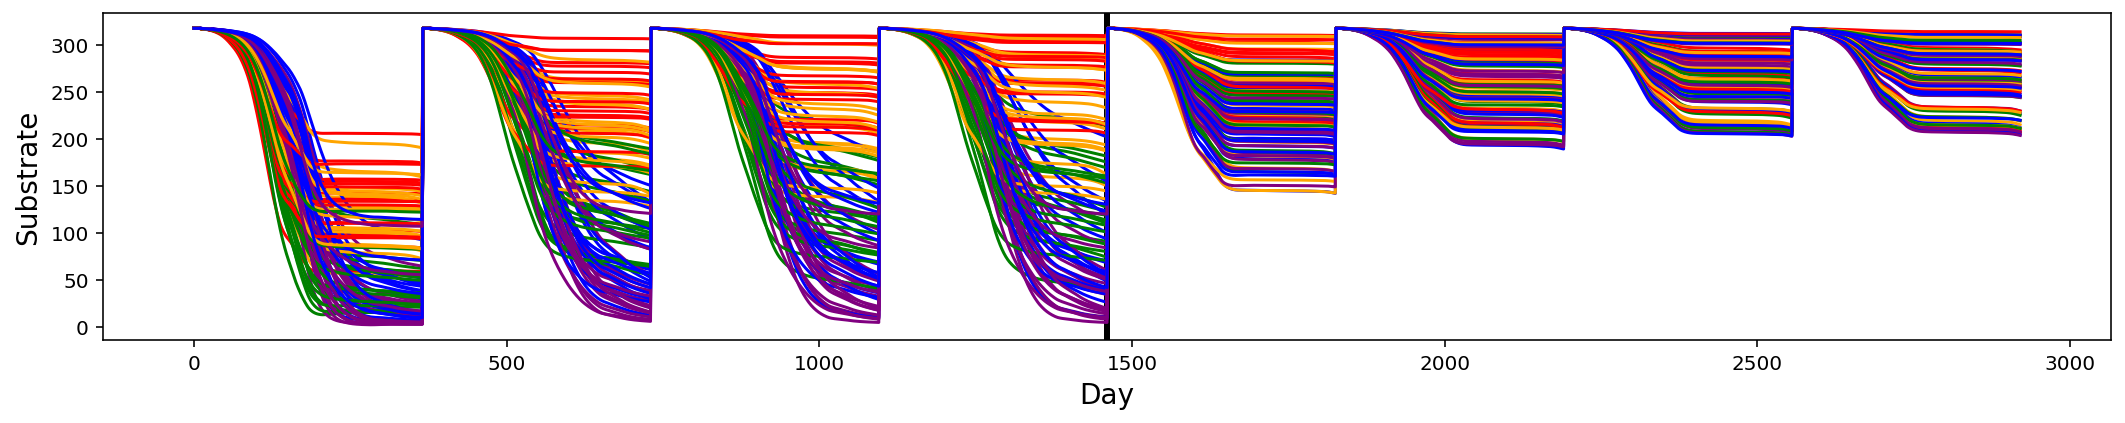

In [13]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*4, color='k',linestyle='-',lw=3)
#ax.axvline(x=365*3, color='k',linestyle='-',lw=3)

for replicate in range(sub_de_de.shape[1]):
    ax.plot(sub_de_de.iloc[:,replicate],color='red')
    ax.plot(sub_sc_de.iloc[:,replicate],color='orange')
    ax.plot(sub_gr_de.iloc[:,replicate],color='green')
    ax.plot(sub_pi_de.iloc[:,replicate],color='purple')
    ax.plot(sub_su_de.iloc[:,replicate],color='blue')
    
#ax.plot(sub_de_de.mean(axis=1),color='red')
plt.show()

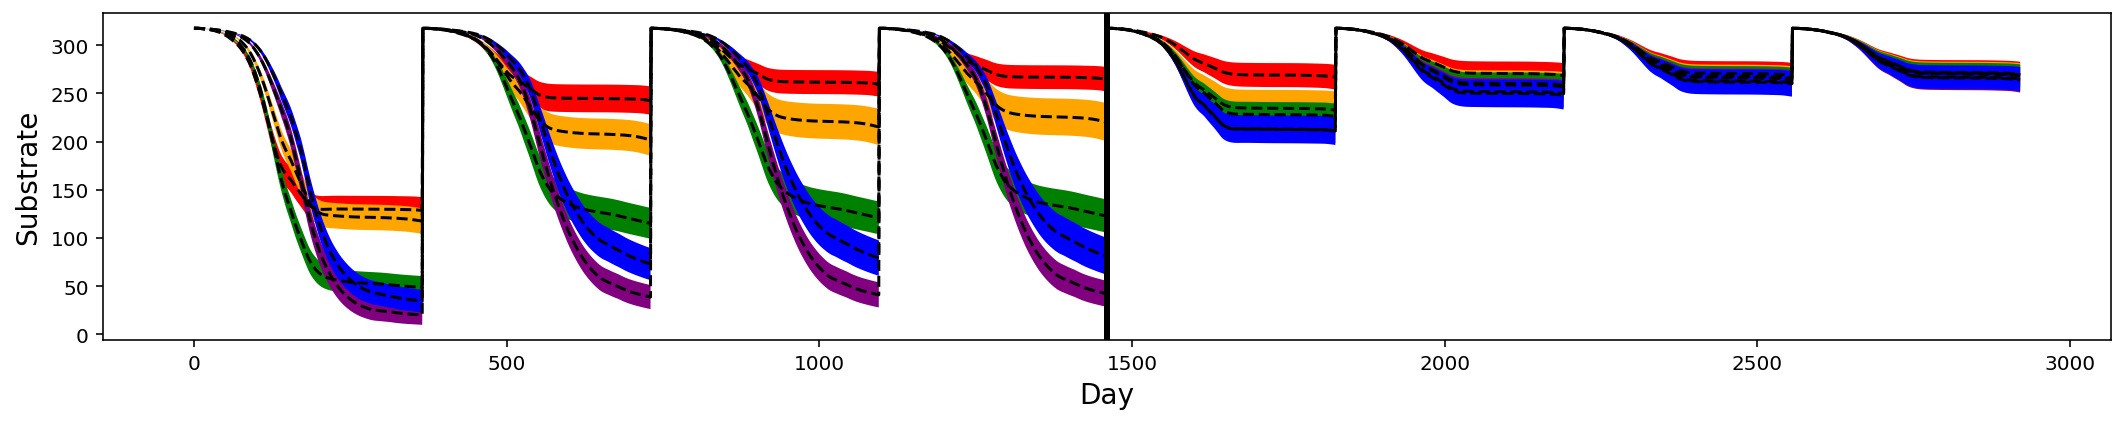

In [6]:
## 95% confidence interval
alpha = 0.10
sub_de_de_bound   = confi_interval(sub_de_de.iloc[:,:],alpha)
sub_sc_de_bound   = confi_interval(sub_sc_de.iloc[:,:],alpha)
sub_gr_de_bound   = confi_interval(sub_gr_de.iloc[:,:],alpha)
sub_pi_de_bound   = confi_interval(sub_pi_de.iloc[:,:],alpha)
sub_su_de_bound   = confi_interval(sub_su_de.iloc[:,:],alpha)


fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*4, color='k',linestyle='-',lw=3)
#ax.axvline(x=365*3, color='k',linestyle='-',lw=3)

ax.plot(sub_de_de.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_de_de.index[:],y1=sub_de_de_bound[0][:],y2=sub_de_de_bound[1][:], facecolor='red',alpha=1.0)

ax.plot(sub_sc_de.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_sc_de.index[:],y1=sub_sc_de_bound[0][:],y2=sub_sc_de_bound[1][:], facecolor='orange',alpha=1.0)

ax.plot(sub_gr_de.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_gr_de.index[:],y1=sub_gr_de_bound[0][:],y2=sub_gr_de_bound[1][:], facecolor='green',alpha=1.0)

ax.plot(sub_pi_de.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_pi_de.index[:],y1=sub_pi_de_bound[0][:],y2=sub_pi_de_bound[1][:], facecolor='purple',alpha=1.0)

ax.plot(sub_su_de.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_su_de.index[:],y1=sub_su_de_bound[0][:],y2=sub_su_de_bound[1][:], facecolor='blue',alpha=1.0)


plt.show()

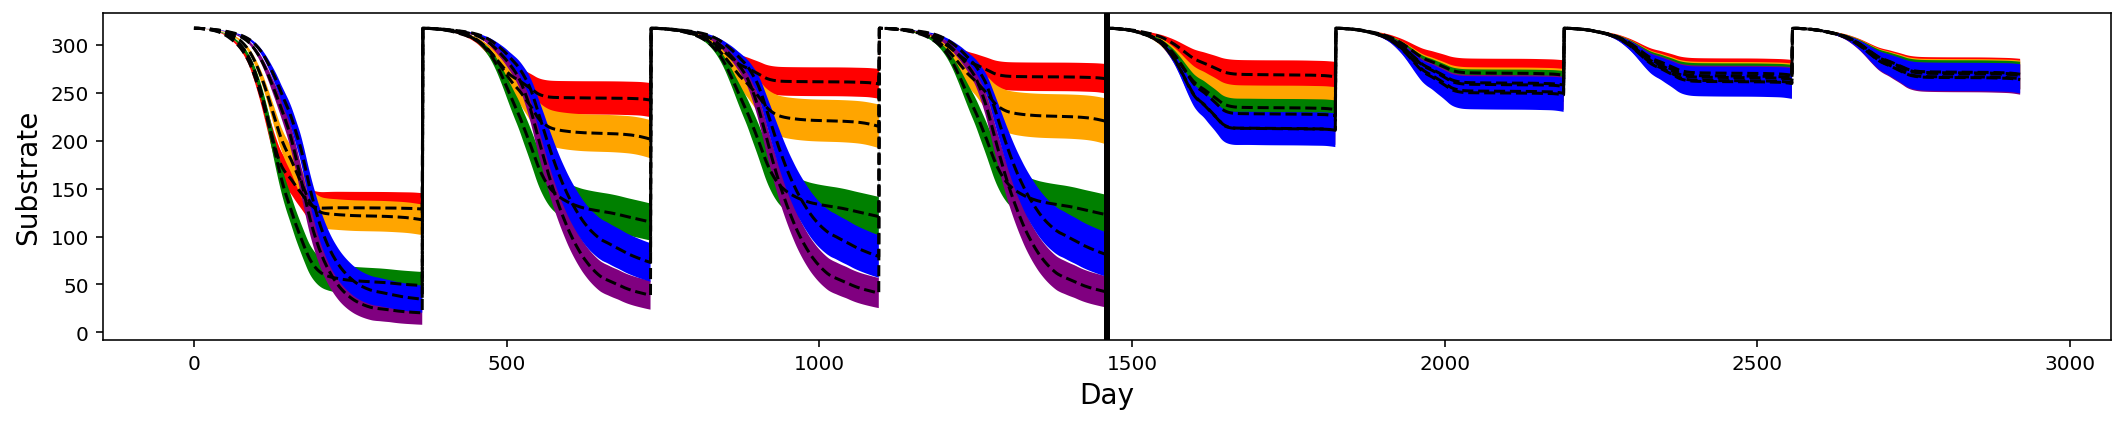

### decompositon @ Scrubland

In [30]:
sub_de_sc = pd.read_csv('desert/Sub_desert_scrubland.csv',      index_col=0)/10000
sub_sc_sc = pd.read_csv('scrubland/Sub_scrubland_scrubland.csv',index_col=0)/10000
sub_gr_sc = pd.read_csv('grassland/Sub_grassland_scrubland.csv',index_col=0)/10000
sub_pi_sc = pd.read_csv('pineoak/Sub_pineoak_scrubland.csv',    index_col=0)/10000
sub_su_sc = pd.read_csv('subalpine/Sub_subalpine_scrubland.csv',index_col=0)/10000


## 95% confidence interval
sub_de_sc_bound   = confi_interval(sub_de_sc.iloc[:,:],alpha)
sub_sc_sc_bound   = confi_interval(sub_sc_sc.iloc[:,:],alpha)
sub_gr_sc_bound   = confi_interval(sub_gr_sc.iloc[:,:],alpha)
sub_pi_sc_bound   = confi_interval(sub_pi_sc.iloc[:,:],alpha)
sub_su_sc_bound   = confi_interval(sub_su_sc.iloc[:,:],alpha)

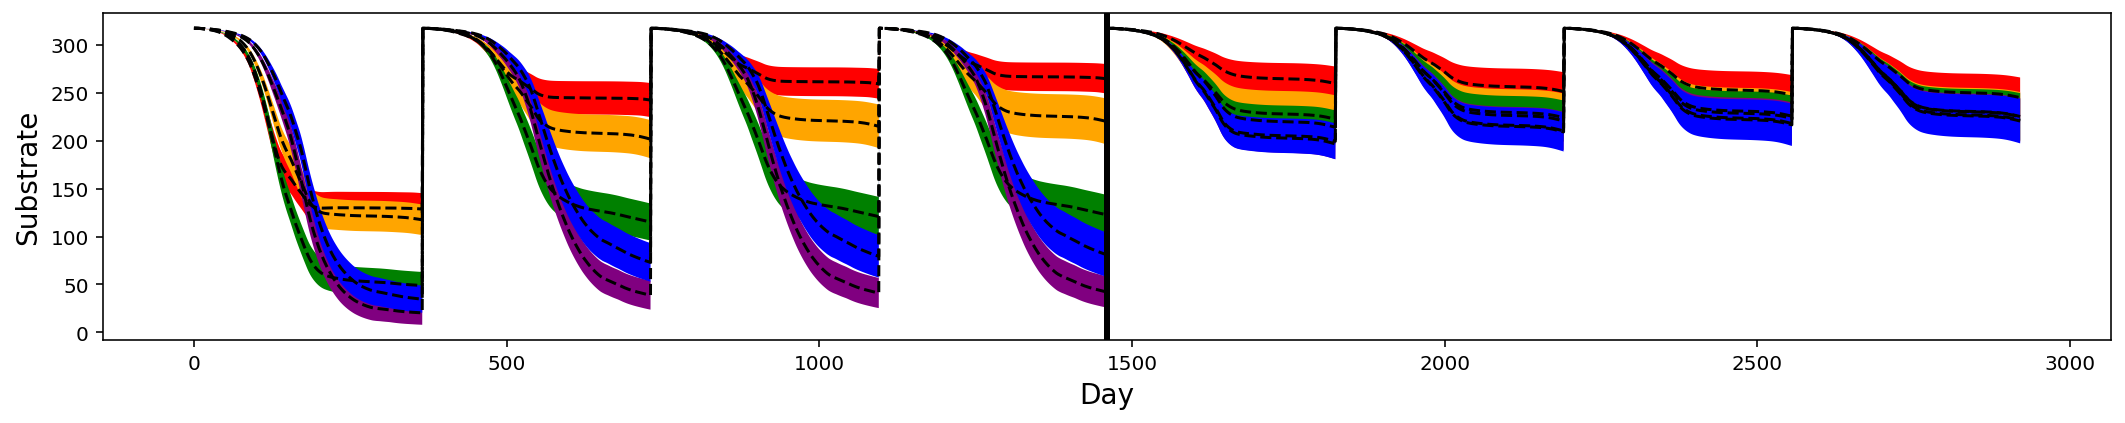

In [31]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*4, color='k',linestyle='-',lw=3)
#ax.axvline(x=365*3, color='k',linestyle='-',lw=3)

ax.plot(sub_de_sc.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_de_sc.index[:],y1=sub_de_sc_bound[0][:],y2=sub_de_sc_bound[1][:], facecolor='red',alpha=1.0)

ax.plot(sub_sc_sc.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_sc_sc.index[:],y1=sub_sc_sc_bound[0][:],y2=sub_sc_sc_bound[1][:], facecolor='orange',alpha=1.0)

ax.plot(sub_gr_sc.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_gr_sc.index[:],y1=sub_gr_sc_bound[0][:],y2=sub_gr_sc_bound[1][:], facecolor='green',alpha=1.0)

ax.plot(sub_pi_sc.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_pi_sc.index[:],y1=sub_pi_sc_bound[0][:],y2=sub_pi_sc_bound[1][:], facecolor='purple',alpha=1.0)

ax.plot(sub_su_sc.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_su_sc.index[:],y1=sub_su_sc_bound[0][:],y2=sub_su_sc_bound[1][:], facecolor='blue',alpha=1.0)


plt.show()

### decomposition @ Grassland

In [16]:
sub_de_gr = pd.read_csv('desert/Sub_desert_grassland.csv',index_col=0)/10000
sub_sc_gr = pd.read_csv('scrubland/Sub_scrubland_grassland.csv',index_col=0)/10000
sub_gr_gr = pd.read_csv('grassland/Sub_grassland_grassland.csv',index_col=0)/10000
sub_pi_gr = pd.read_csv('pineoak/Sub_pineoak_grassland.csv',index_col=0)/10000
sub_su_gr = pd.read_csv('subalpine/Sub_subalpine_grassland.csv',index_col=0)/10000


## 95% confidence interval
sub_de_gr_bound   = confi_interval(sub_de_gr.iloc[:,:],alpha)
sub_sc_gr_bound   = confi_interval(sub_sc_gr.iloc[:,:],alpha)
sub_gr_gr_bound   = confi_interval(sub_gr_gr.iloc[:,:],alpha)
sub_pi_gr_bound   = confi_interval(sub_pi_gr.iloc[:,:],alpha)
sub_su_gr_bound   = confi_interval(sub_su_gr.iloc[:,:],alpha)

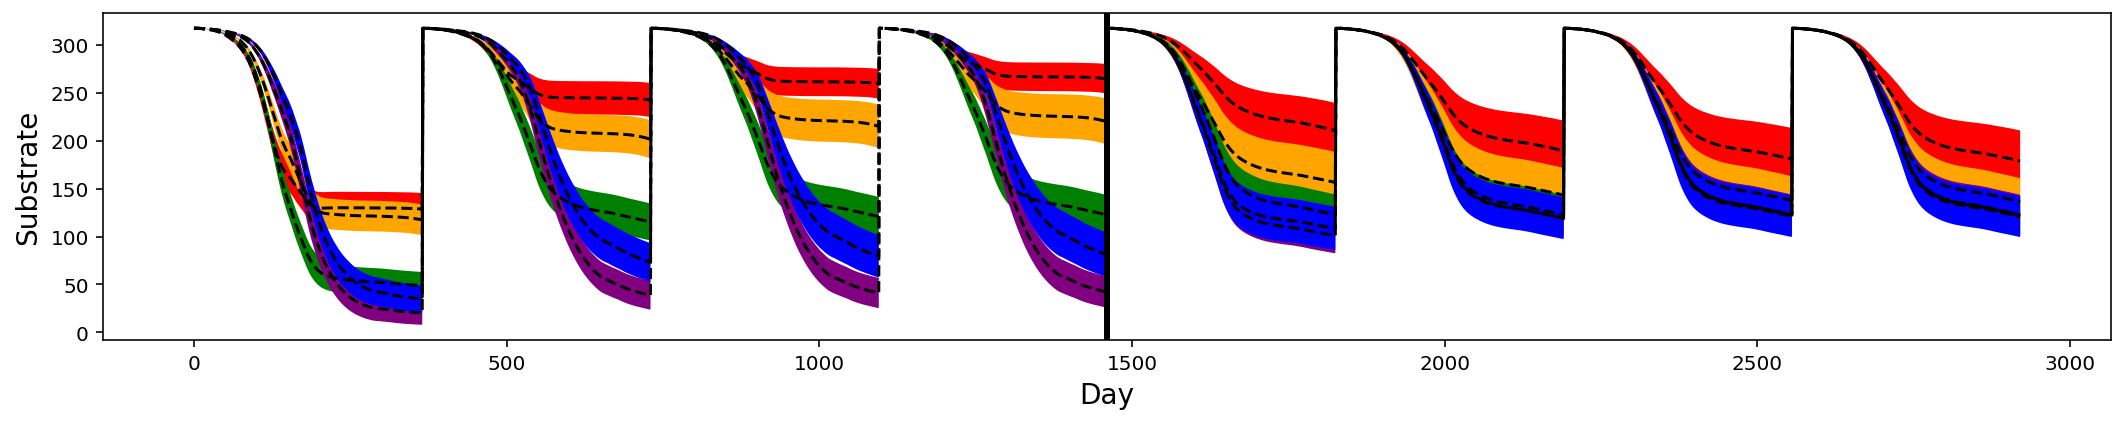

In [17]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*4, color='k',linestyle='-',lw=3)
#ax.axvline(x=365*3, color='k',linestyle='-',lw=3)

ax.plot(sub_de_gr.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_de_gr.index[:],y1=sub_de_gr_bound[0][:],y2=sub_de_gr_bound[1][:], facecolor='red',alpha=1.0)

ax.plot(sub_sc_gr.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_sc_gr.index[:],y1=sub_sc_gr_bound[0][:],y2=sub_sc_gr_bound[1][:], facecolor='orange',alpha=1.0)

ax.plot(sub_gr_gr.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_gr_gr.index[:],y1=sub_gr_gr_bound[0][:],y2=sub_gr_gr_bound[1][:], facecolor='green',alpha=1.0)

ax.plot(sub_pi_gr.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_pi_gr.index[:],y1=sub_pi_gr_bound[0][:],y2=sub_pi_gr_bound[1][:], facecolor='purple',alpha=1.0)

ax.plot(sub_su_gr.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_su_gr.index[:],y1=sub_su_gr_bound[0][:],y2=sub_su_gr_bound[1][:], facecolor='blue',alpha=1.0)


plt.show()

### decomposition @ Pine-oak

In [32]:
sub_de_pi = pd.read_csv('desert/Sub_desert_pineoak.csv',      index_col=0)/10000
sub_sc_pi = pd.read_csv('scrubland/Sub_scrubland_pineoak.csv',index_col=0)/10000
sub_gr_pi = pd.read_csv('grassland/Sub_grassland_pineoak.csv',index_col=0)/10000
sub_pi_pi = pd.read_csv('pineoak/Sub_pineoak_pineoak.csv',    index_col=0)/10000
sub_su_pi = pd.read_csv('subalpine/Sub_subalpine_pineoak.csv',index_col=0)/10000


## 95% confidence interval
alpha = 0.05

sub_de_pi_bound   = confi_interval(sub_de_pi.iloc[:,:],alpha)
sub_sc_pi_bound   = confi_interval(sub_sc_pi.iloc[:,:],alpha)
sub_gr_pi_bound   = confi_interval(sub_gr_pi.iloc[:,:],alpha)
sub_pi_pi_bound   = confi_interval(sub_pi_pi.iloc[:,:],alpha)
sub_su_pi_bound   = confi_interval(sub_su_pi.iloc[:,:],alpha)

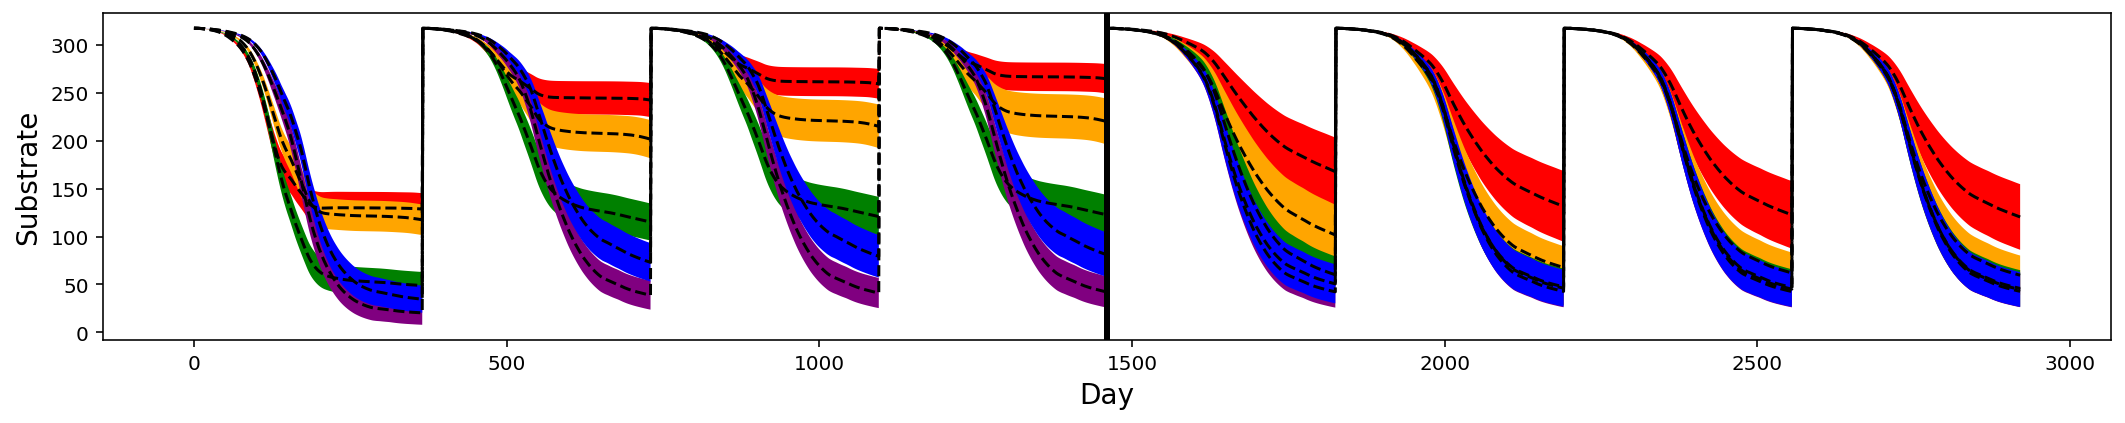

In [33]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*4, color='k',linestyle='-',lw=3)
#ax.axvline(x=365*3, color='k',linestyle='-',lw=3)

ax.plot(sub_de_pi.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_de_pi.index[:],y1=sub_de_pi_bound[0][:],y2=sub_de_pi_bound[1][:], facecolor='red',alpha=1.0)

ax.plot(sub_sc_pi.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_sc_pi.index[:],y1=sub_sc_pi_bound[0][:],y2=sub_sc_pi_bound[1][:], facecolor='orange',alpha=1.0)

ax.plot(sub_gr_pi.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_gr_pi.index[:],y1=sub_gr_pi_bound[0][:],y2=sub_gr_pi_bound[1][:], facecolor='green',alpha=1.0)

ax.plot(sub_pi_pi.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_pi_pi.index[:],y1=sub_pi_pi_bound[0][:],y2=sub_pi_pi_bound[1][:], facecolor='purple',alpha=1.0)

ax.plot(sub_su_pi.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_su_pi.index[:],y1=sub_su_pi_bound[0][:],y2=sub_su_pi_bound[1][:], facecolor='blue',alpha=1.0)


plt.show()

### Decomposition @ Subalpine

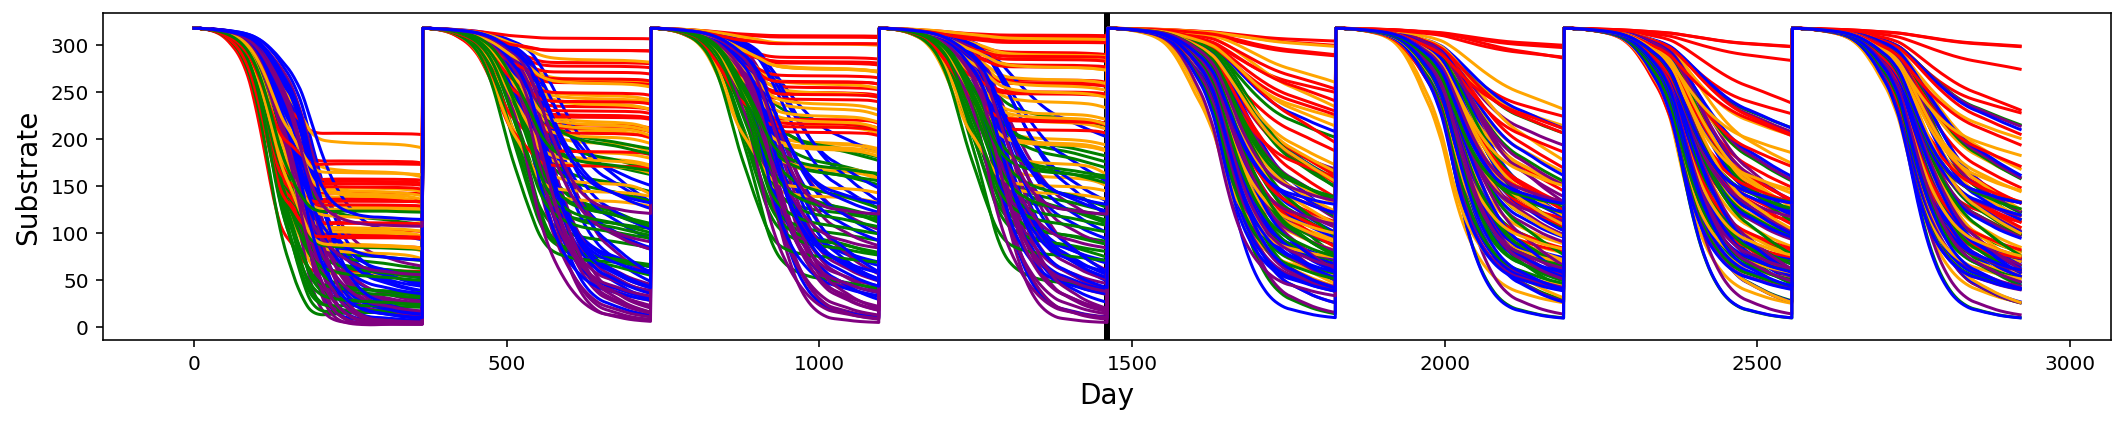

In [3]:
sub_de_su = pd.read_csv('desert/Sub_desert_subalpine.csv',      index_col=0)/10000
sub_sc_su = pd.read_csv('scrubland/Sub_scrubland_subalpine.csv',index_col=0)/10000
sub_gr_su = pd.read_csv('grassland/Sub_grassland_subalpine.csv',index_col=0)/10000
sub_pi_su = pd.read_csv('pineoak/Sub_pineoak_subalpine.csv',    index_col=0)/10000
sub_su_su = pd.read_csv('subalpine/Sub_subalpine_subalpine.csv',index_col=0)/10000

fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*4, color='k',linestyle='-',lw=3)
#ax.axvline(x=365*3, color='k',linestyle='-',lw=3)

for replicate in range(sub_de_su.shape[1]):
    ax.plot(sub_de_su.iloc[:,replicate],color='red')
    ax.plot(sub_sc_su.iloc[:,replicate],color='orange')
    ax.plot(sub_gr_su.iloc[:,replicate],color='green')
    ax.plot(sub_pi_su.iloc[:,replicate],color='purple')
    ax.plot(sub_su_su.iloc[:,replicate],color='blue')
    
#ax.plot(sub_de_de.mean(axis=1),color='red')
plt.show()

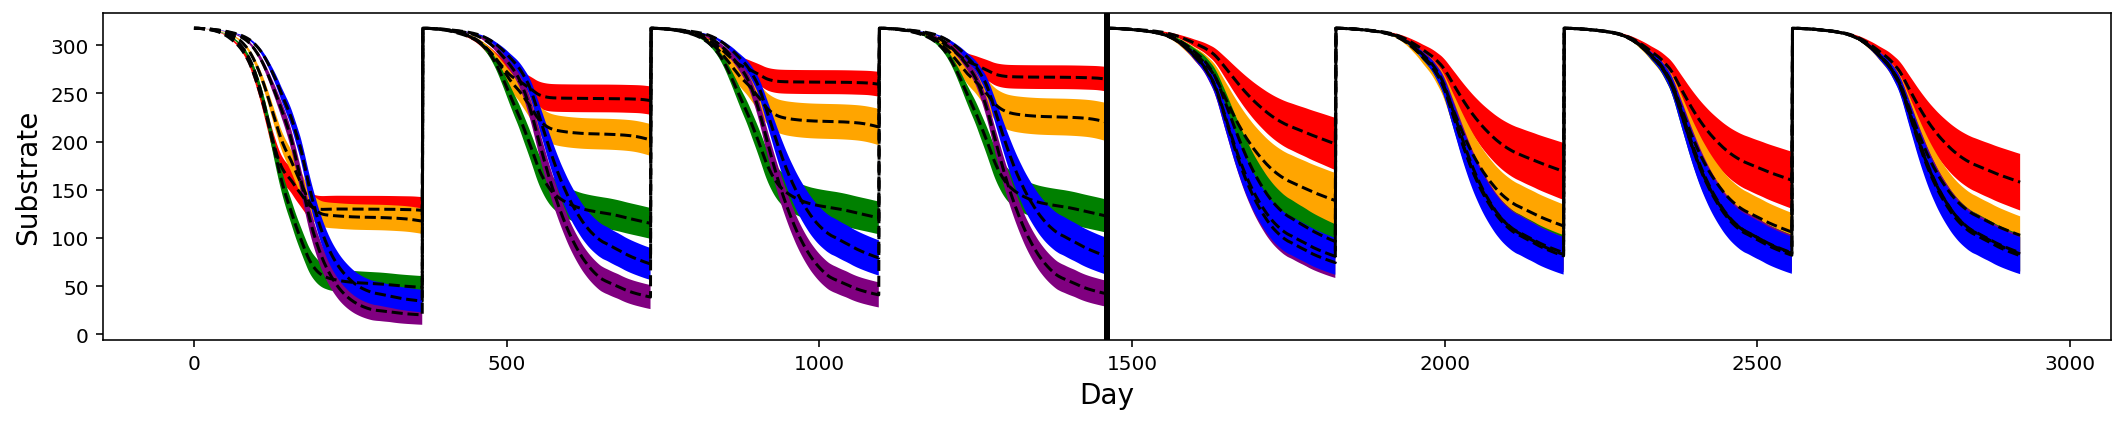

In [4]:
## confidence interval
alpha = 0.10

sub_de_su_bound   = confi_interval(sub_de_su.iloc[:,:],alpha)
sub_sc_su_bound   = confi_interval(sub_sc_su.iloc[:,:],alpha)
sub_gr_su_bound   = confi_interval(sub_gr_su.iloc[:,:],alpha)
sub_pi_su_bound   = confi_interval(sub_pi_su.iloc[:,:],alpha)
sub_su_su_bound   = confi_interval(sub_su_su.iloc[:,:],alpha)

fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*4, color='k',linestyle='-',lw=3)
#ax.axvline(x=365*3, color='k',linestyle='-',lw=3)

ax.plot(sub_de_su.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_de_su.index[:],y1=sub_de_su_bound[0][:],y2=sub_de_su_bound[1][:], facecolor='red',alpha=1.0)

ax.plot(sub_sc_su.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_sc_su.index[:],y1=sub_sc_su_bound[0][:],y2=sub_sc_su_bound[1][:], facecolor='orange',alpha=1.0)

ax.plot(sub_gr_su.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_gr_su.index[:],y1=sub_gr_su_bound[0][:],y2=sub_gr_su_bound[1][:], facecolor='green',alpha=1.0)

ax.plot(sub_pi_su.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_pi_su.index[:],y1=sub_pi_su_bound[0][:],y2=sub_pi_su_bound[1][:], facecolor='purple',alpha=1.0)

ax.plot(sub_su_su.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=sub_su_su.index[:],y1=sub_su_su_bound[0][:],y2=sub_su_su_bound[1][:], facecolor='blue',alpha=1.0)


plt.show()

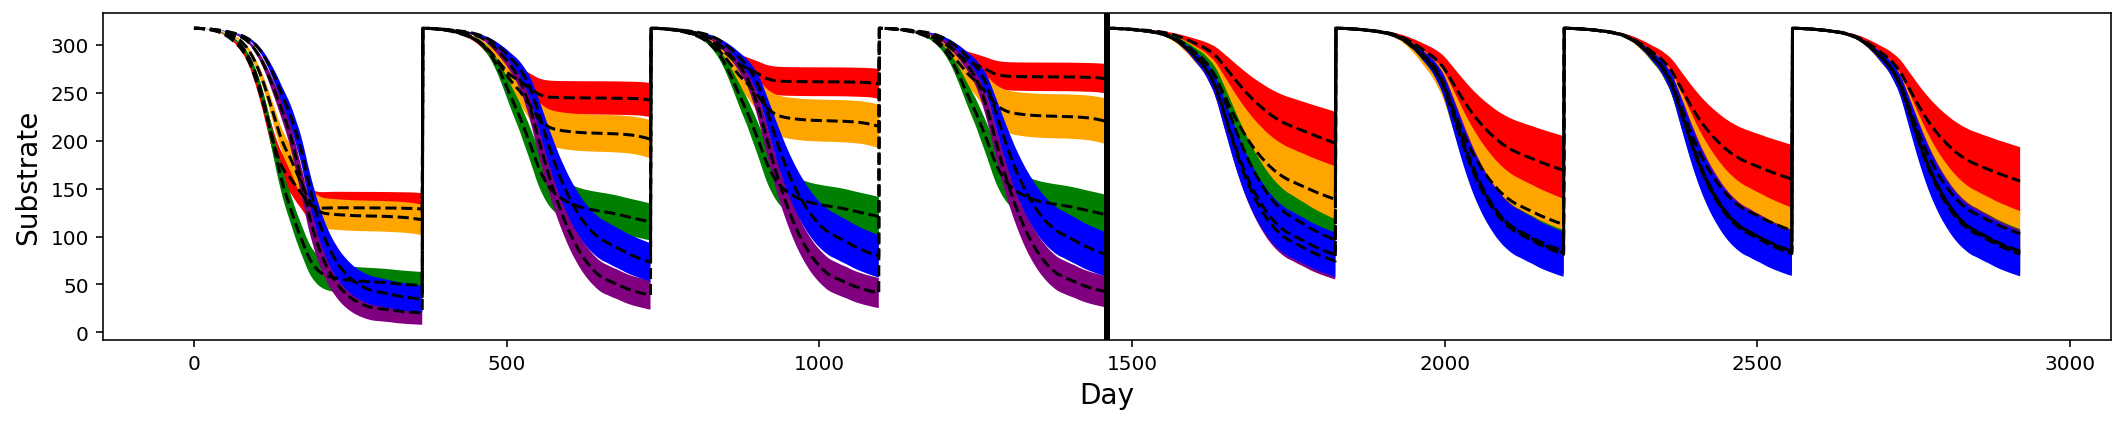

## drought tolerance trait

### desert

In [21]:
drt_de_de = pd.read_csv('desert/Drt_desert_desert.csv',   index_col=0)
drt_sc_de = pd.read_csv('scrubland/Drt_scrubland_desert.csv',index_col=0)
drt_gr_de = pd.read_csv('grassland/Drt_grassland_desert.csv',index_col=0)
drt_pi_de = pd.read_csv('pineoak/Drt_pineoak_desert.csv',  index_col=0)
drt_su_de = pd.read_csv('subalpine/Drt_subalpine_desert.csv',index_col=0)

drt_de_de.head()

0         1         2         3         4         5         6  \
0  0.505518  0.497614  0.498693  0.501067  0.500503  0.499510  0.503502   
1  0.505672  0.497701  0.498515  0.500850  0.500864  0.499520  0.503196   
2  0.505591  0.497759  0.498321  0.500666  0.501213  0.499398  0.503018   
3  0.505501  0.497775  0.498312  0.500533  0.501416  0.499529  0.502743   
4  0.505388  0.498013  0.498436  0.500336  0.501440  0.499594  0.502484   

          7         8         9        10        11        12        13  \
0  0.497709  0.490768  0.495999  0.499332  0.504566  0.499331  0.503083   
1  0.497692  0.490951  0.496085  0.499517  0.504702  0.499308  0.503189   
2  0.497844  0.491009  0.496185  0.499608  0.504767  0.499185  0.503331   
3  0.497765  0.491198  0.496318  0.499852  0.504927  0.499083  0.503459   
4  0.497640  0.491265  0.496307  0.500058  0.504955  0.499067  0.503502   

         14        15        16        17        18        19  
0  0.496095  0.498111  0.504749  0.500997  0.498779  0.494509  
1  0.495853  0.498128  0.504555  0.500766  0.498580  0.494086  
2  0.495739  0.498004  0.504327  0.500617  0.498434  0.493752  
3  0.495725  0.497947  0.504235  0.500526  0.498218  0.493410  
4  0.495777  0.497893  0.504088  0.500443  0.498085  0.493170

In [22]:
## 95% confidence interval
drt_de_de_bound   = confi_interval(drt_de_de.iloc[:,:])
drt_sc_de_bound   = confi_interval(drt_sc_de.iloc[:,:])
drt_gr_de_bound   = confi_interval(drt_gr_de.iloc[:,:])
drt_pi_de_bound   = confi_interval(drt_pi_de.iloc[:,:])
drt_su_de_bound   = confi_interval(drt_su_de.iloc[:,:])

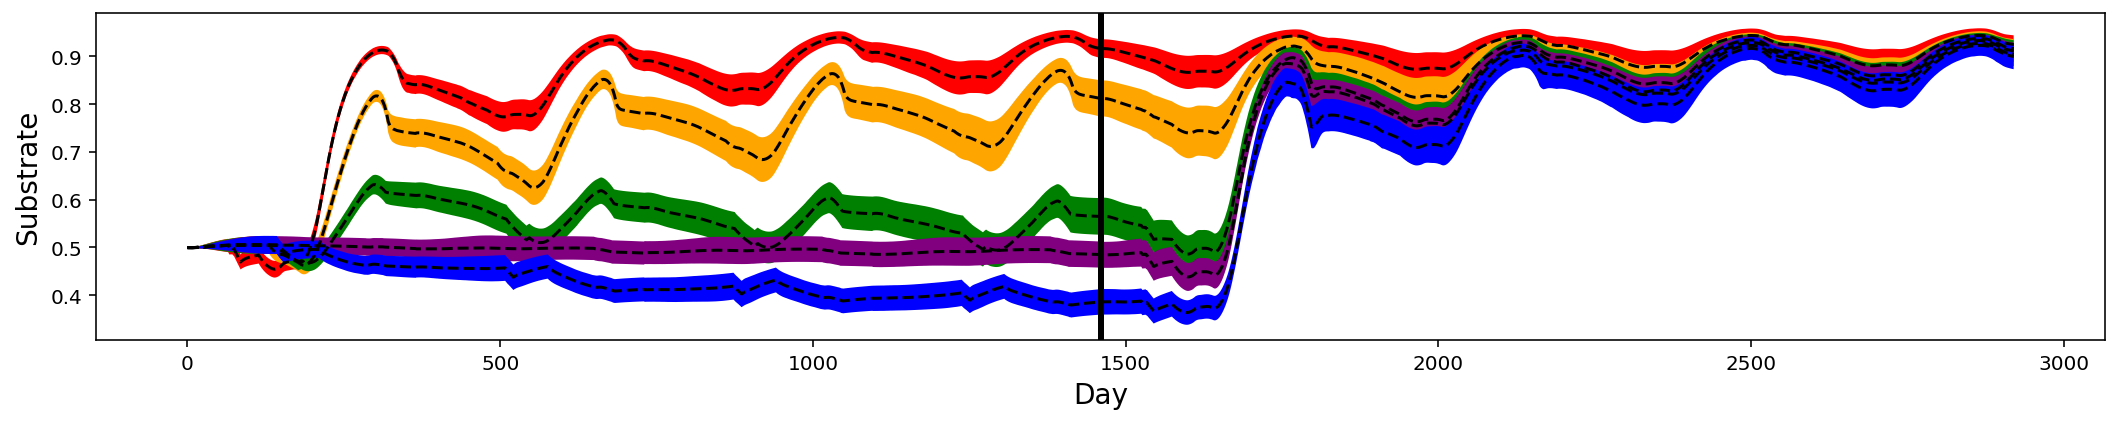

In [23]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*4, color='k',linestyle='-',lw=3)
#ax.axvline(x=365*3, color='k',linestyle='-',lw=3)

ax.plot(drt_de_de.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=drt_de_de.index[:],y1=drt_de_de_bound[0][:],y2=drt_de_de_bound[1][:], facecolor='red',alpha=1.0)

ax.plot(drt_sc_de.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=drt_sc_de.index[:],y1=drt_sc_de_bound[0][:],y2=drt_sc_de_bound[1][:], facecolor='orange',alpha=1.0)

ax.plot(drt_gr_de.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=drt_gr_de.index[:],y1=drt_gr_de_bound[0][:],y2=drt_gr_de_bound[1][:], facecolor='green',alpha=1.0)

ax.plot(drt_pi_de.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=drt_pi_de.index[:],y1=drt_pi_de_bound[0][:],y2=drt_pi_de_bound[1][:], facecolor='purple',alpha=1.0)

ax.plot(drt_su_de.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=drt_su_de.index[:],y1=drt_su_de_bound[0][:],y2=drt_su_de_bound[1][:], facecolor='blue',alpha=1.0)


plt.show()

### subalpine

In [24]:
drt_de_su = pd.read_csv('desert/Drt_desert_subalpine.csv',index_col=0)
drt_sc_su = pd.read_csv('scrubland/Drt_scrubland_subalpine.csv',index_col=0)
drt_gr_su = pd.read_csv('grassland/Drt_grassland_subalpine.csv',index_col=0)
drt_pi_su = pd.read_csv('pineoak/Drt_pineoak_subalpine.csv',index_col=0)
drt_su_su = pd.read_csv('subalpine/Drt_subalpine_subalpine.csv',index_col=0)

In [25]:
drt_de_su_bound   = confi_interval(drt_de_su.iloc[:,:])
drt_sc_su_bound   = confi_interval(drt_sc_su.iloc[:,:])
drt_gr_su_bound   = confi_interval(drt_gr_su.iloc[:,:])
drt_pi_su_bound   = confi_interval(drt_pi_su.iloc[:,:])
drt_su_su_bound   = confi_interval(drt_su_su.iloc[:,:])

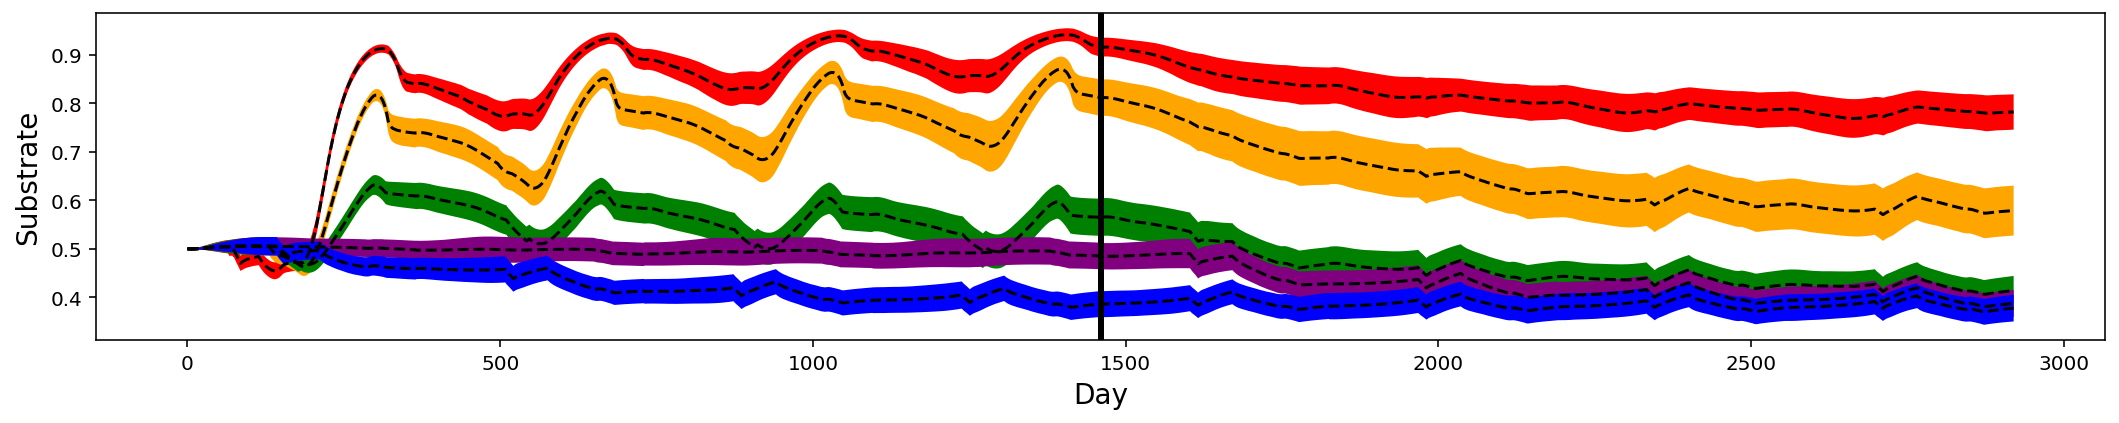

In [26]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*4, color='k',linestyle='-',lw=3)
#ax.axvline(x=365*3, color='k',linestyle='-',lw=3)

ax.plot(drt_de_su.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=drt_de_su.index[:],y1=drt_de_su_bound[0][:],y2=drt_de_su_bound[1][:], facecolor='red',alpha=1.0)

ax.plot(drt_sc_su.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=drt_sc_su.index[:],y1=drt_sc_su_bound[0][:],y2=drt_sc_su_bound[1][:], facecolor='orange',alpha=1.0)

ax.plot(drt_gr_su.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=drt_gr_su.index[:],y1=drt_gr_su_bound[0][:],y2=drt_gr_su_bound[1][:], facecolor='green',alpha=1.0)

ax.plot(drt_pi_su.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=drt_pi_su.index[:],y1=drt_pi_su_bound[0][:],y2=drt_pi_su_bound[1][:], facecolor='purple',alpha=1.0)

ax.plot(drt_su_su.mean(axis=1).iloc[:],color='k',linestyle='--')
ax.fill_between(x=drt_su_su.index[:],y1=drt_su_su_bound[0][:],y2=drt_su_su_bound[1][:], facecolor='blue',alpha=1.0)


plt.show()

## Enzyme Trait

### desert

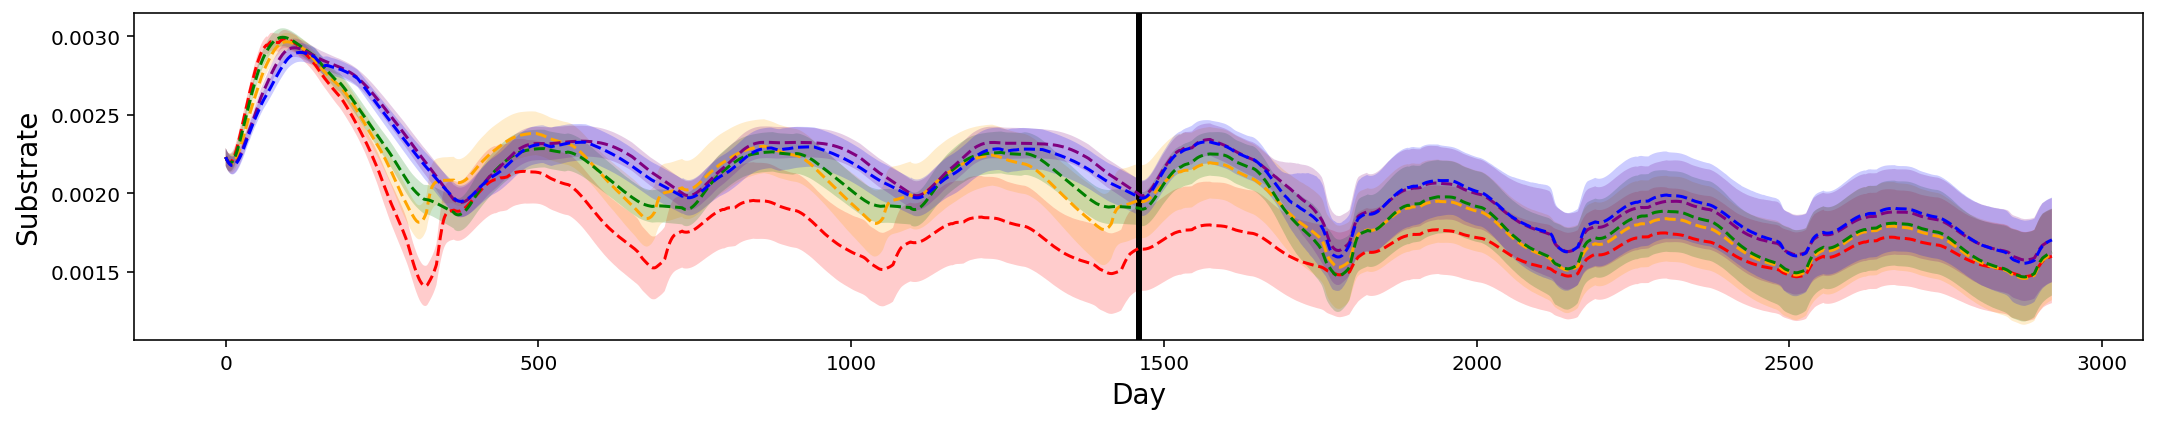

In [37]:
enz_de_de = pd.read_csv('desert/Enz_desert_desert.csv',      index_col=0)
enz_sc_de = pd.read_csv('scrubland/Enz_scrubland_desert.csv',index_col=0)
enz_gr_de = pd.read_csv('grassland/Enz_grassland_desert.csv',index_col=0)
enz_pi_de = pd.read_csv('pineoak/Enz_pineoak_desert.csv',    index_col=0)
enz_su_de = pd.read_csv('subalpine/Enz_subalpine_desert.csv',index_col=0)

enz_de_de_bound   = confi_interval(enz_de_de.iloc[:,:])
enz_sc_de_bound   = confi_interval(enz_sc_de.iloc[:,:])
enz_gr_de_bound   = confi_interval(enz_gr_de.iloc[:,:])
enz_pi_de_bound   = confi_interval(enz_pi_de.iloc[:,:])
enz_su_de_bound   = confi_interval(enz_su_de.iloc[:,:])

fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*4, color='k',linestyle='-',lw=3)
#ax.axvline(x=365*3, color='k',linestyle='-',lw=3)

ax.plot(enz_de_de.mean(axis=1).iloc[:],color='red',linestyle='--')
ax.fill_between(x=enz_de_de.index[:],y1=enz_de_de_bound[0][:],y2=enz_de_de_bound[1][:], facecolor='red',alpha=0.2)

ax.plot(enz_sc_de.mean(axis=1).iloc[:],color='orange',linestyle='--')
ax.fill_between(x=enz_sc_de.index[:],y1=enz_sc_de_bound[0][:],y2=enz_sc_de_bound[1][:], facecolor='orange',alpha=0.2)

ax.plot(enz_gr_de.mean(axis=1).iloc[:],color='green',linestyle='--')
ax.fill_between(x=enz_gr_de.index[:],y1=enz_gr_de_bound[0][:],y2=enz_gr_de_bound[1][:], facecolor='green',alpha=0.2)

ax.plot(enz_pi_de.mean(axis=1).iloc[:],color='purple',linestyle='--')
ax.fill_between(x=enz_pi_de.index[:],y1=enz_pi_de_bound[0][:],y2=enz_pi_de_bound[1][:], facecolor='purple',alpha=0.2)

ax.plot(enz_su_de.mean(axis=1).iloc[:],color='blue',linestyle='--')
ax.fill_between(x=enz_su_de.index[:],y1=enz_su_de_bound[0][:],y2=enz_su_de_bound[1][:], facecolor='blue',alpha=0.2)


plt.show()

### subalpine

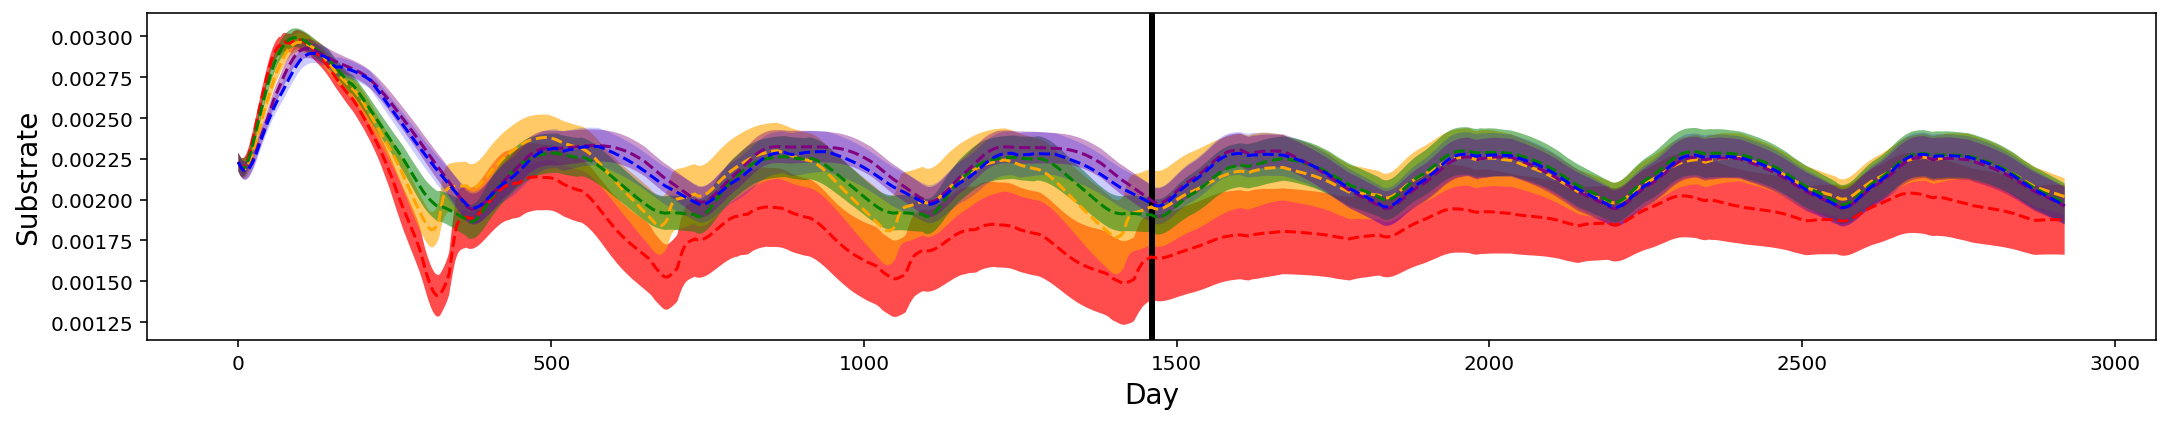

In [40]:
enz_de_su = pd.read_csv('desert/Enz_desert_subalpine.csv',index_col=0)
enz_sc_su = pd.read_csv('scrubland/Enz_scrubland_subalpine.csv',index_col=0)
enz_gr_su = pd.read_csv('grassland/Enz_grassland_subalpine.csv',index_col=0)
enz_pi_su = pd.read_csv('pineoak/Enz_pineoak_subalpine.csv',index_col=0)
enz_su_su = pd.read_csv('subalpine/Enz_subalpine_subalpine.csv',index_col=0)

enz_de_su_bound   = confi_interval(enz_de_su.iloc[:,:])
enz_sc_su_bound   = confi_interval(enz_sc_su.iloc[:,:])
enz_gr_su_bound   = confi_interval(enz_gr_su.iloc[:,:])
enz_pi_su_bound   = confi_interval(enz_pi_su.iloc[:,:])
enz_su_su_bound   = confi_interval(enz_su_su.iloc[:,:])

fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*4, color='k',linestyle='-',lw=3)
#ax.axvline(x=365*3, color='k',linestyle='-',lw=3)

ax.plot(enz_de_su.mean(axis=1).iloc[:],color='red',linestyle='--')
ax.fill_between(x=enz_de_su.index[:],y1=enz_de_su_bound[0][:],y2=enz_de_su_bound[1][:], facecolor='red',alpha=0.7)

ax.plot(enz_sc_su.mean(axis=1).iloc[:],color='orange',linestyle='--')
ax.fill_between(x=enz_sc_su.index[:],y1=enz_sc_su_bound[0][:],y2=enz_sc_su_bound[1][:], facecolor='orange',alpha=0.6)

ax.plot(enz_gr_su.mean(axis=1).iloc[:],color='green',linestyle='--')
ax.fill_between(x=enz_gr_su.index[:],y1=enz_gr_su_bound[0][:],y2=enz_gr_su_bound[1][:], facecolor='green',alpha=0.5)

ax.plot(enz_pi_su.mean(axis=1).iloc[:],color='purple',linestyle='--')
ax.fill_between(x=enz_pi_su.index[:],y1=enz_pi_su_bound[0][:],y2=enz_pi_su_bound[1][:], facecolor='purple',alpha=0.4)

ax.plot(enz_su_su.mean(axis=1).iloc[:],color='blue',linestyle='--')
ax.fill_between(x=enz_su_su.index[:],y1=enz_su_su_bound[0][:],y2=enz_su_su_bound[1][:], facecolor='blue',alpha=0.2)


plt.show()

## by site

In [32]:
def visualize_var_site(var,site):
    
    var_site_de = 'desert' +'/' + var + '_' + 'desert' + '_' + site + '.csv'
    var_site_sc = 'scrubland' +'/' + var + '_' + 'scrubland' + '_' + site + '.csv'
    var_site_gr = 'grassland' +'/' + var + '_' + 'grassland' + '_' + site + '.csv'
    var_site_pi = 'pineoak' +'/' + var + '_' + 'pineoak' + '_' + site + '.csv'
    var_site_su = 'subalpine' +'/' + var + '_' + 'subalpine' + '_' + site + '.csv'
    
    if var == "Sub":
        data_de = pd.read_csv(var_site_de,index_col=0).mean(axis=1)/10000
        data_sc = pd.read_csv(var_site_sc,index_col=0).mean(axis=1)/10000
        data_gr = pd.read_csv(var_site_gr,index_col=0).mean(axis=1)/10000
        data_pi = pd.read_csv(var_site_pi,index_col=0).mean(axis=1)/10000
        data_su = pd.read_csv(var_site_su,index_col=0).mean(axis=1)/10000
    elif var == "Mic":
        data_de = pd.read_csv(var_site_de,index_col=0).sum()/10000
        data_sc = pd.read_csv(var_site_sc,index_col=0).sum()/10000
        data_gr = pd.read_csv(var_site_gr,index_col=0).sum()/10000
        data_pi = pd.read_csv(var_site_pi,index_col=0).sum()/10000
        data_su = pd.read_csv(var_site_su,index_col=0).sum()/10000
    else:
        data_de = pd.read_csv(var_site_de,index_col=0).mean(axis=1)
        data_sc = pd.read_csv(var_site_sc,index_col=0).mean(axis=1)
        data_gr = pd.read_csv(var_site_gr,index_col=0).mean(axis=1)
        data_pi = pd.read_csv(var_site_pi,index_col=0).mean(axis=1)
        data_su = pd.read_csv(var_site_su,index_col=0).mean(axis=1)
    
    year=int(8)
    fig,ax = plt.subplots(1,1,figsize=(18,3))
    ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)
    ax.set_xlim(-10,365*year+10)
    #ax.set_ylim(0.0015,0.0035)
    ax.set_xlabel('Day',size=14)
    if var == "Drt":
        ax.set_ylabel('Drought tolerance',size=14)
    elif var=="Enz":
        ax.set_ylabel('Enzyme investment',size=14)
    for i in range(year-1):
        if i==3:
            plt.axvline(x=365*(i+1),color='r',linestyle=':',lw=3)
        else:
            plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)

    ax.plot(data_de.iloc[:],color='red',   lw=2)
    ax.plot(data_sc.iloc[:],color='orange',lw=2)
    ax.plot(data_gr.iloc[:],color='green', lw=2)
    ax.plot(data_pi.iloc[:],color='purple',lw=2)
    ax.plot(data_su.iloc[:],color='blue',  lw=2)


    #legend
    desert    = mpatches.Patch(color='red',label='desert')
    scrubland = mpatches.Patch(color='orange',label='scrubland')
    grassland = mpatches.Patch(color='green',label='grassland')
    pineoak   = mpatches.Patch(color='purple',label='pineoak')
    subalpine = mpatches.Patch(color='blue',label='subalpine')
    ax.legend(handles=[desert,scrubland,grassland,pineoak,subalpine],
              fontsize=12,frameon=False,loc='best',ncol=3)

    plt.show()

## by site

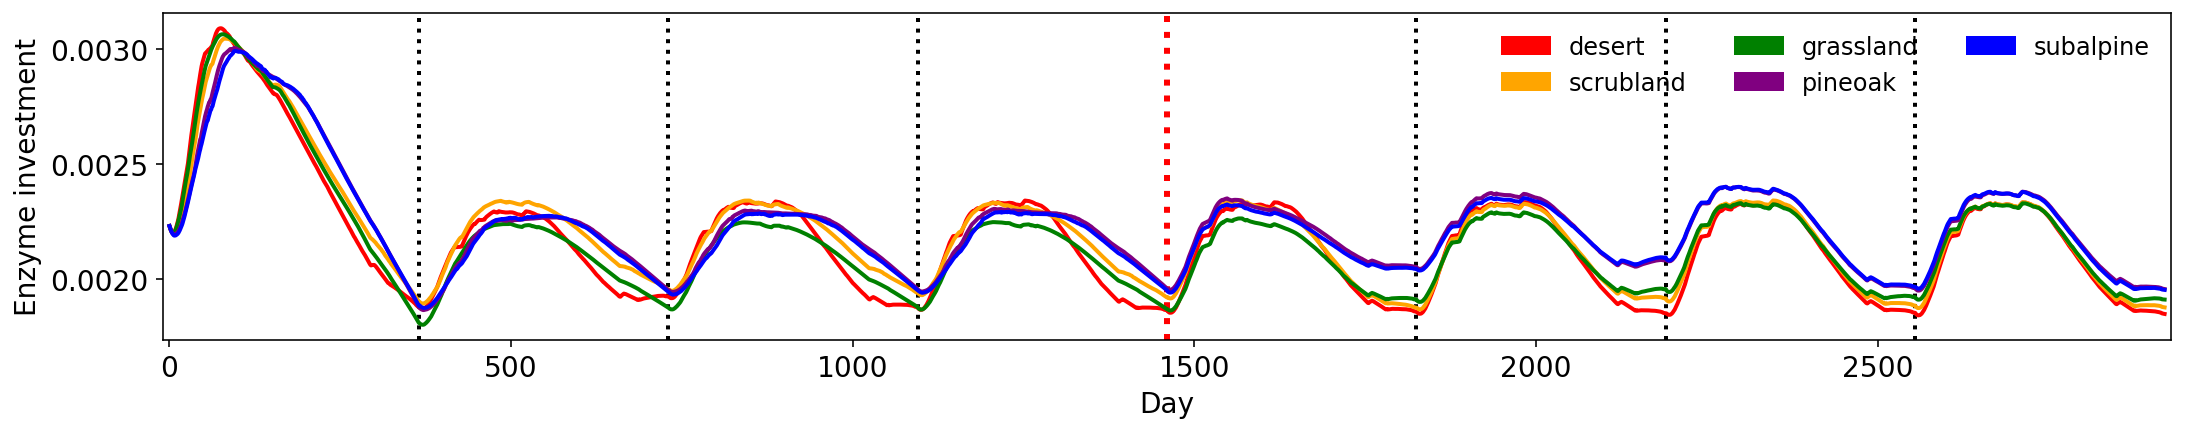

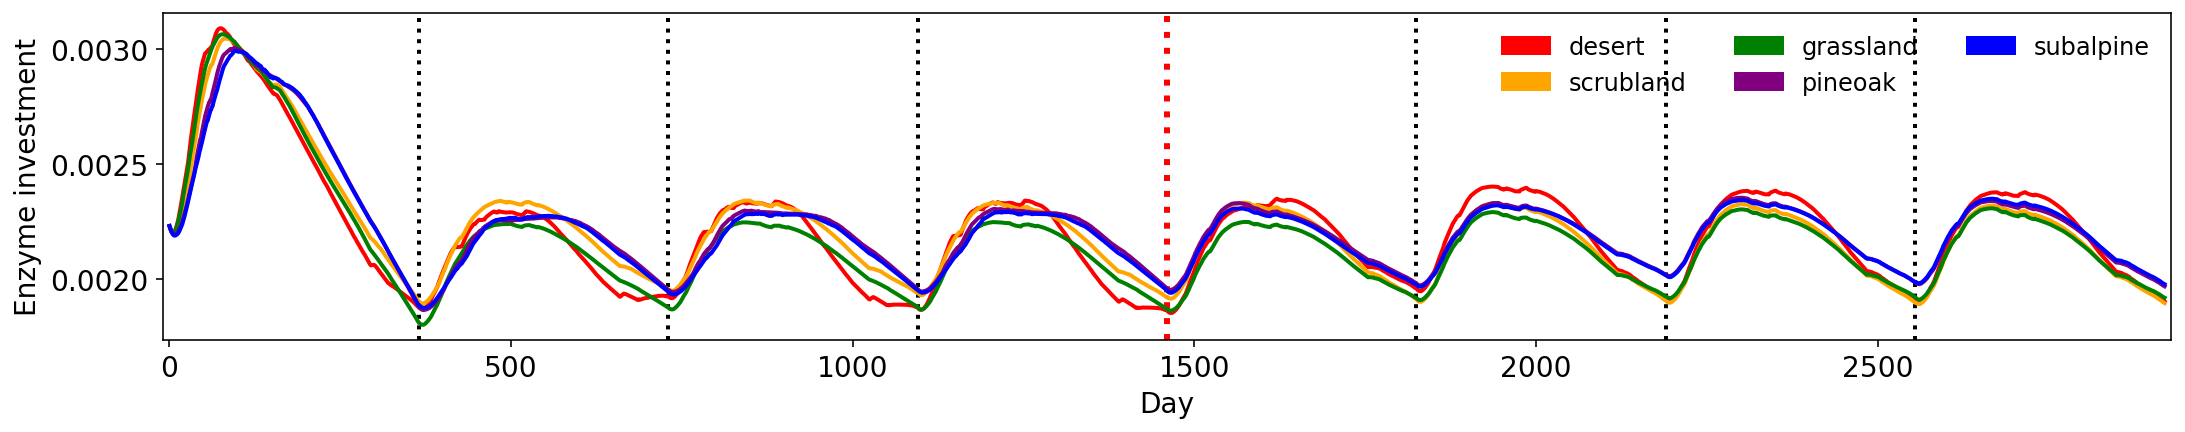

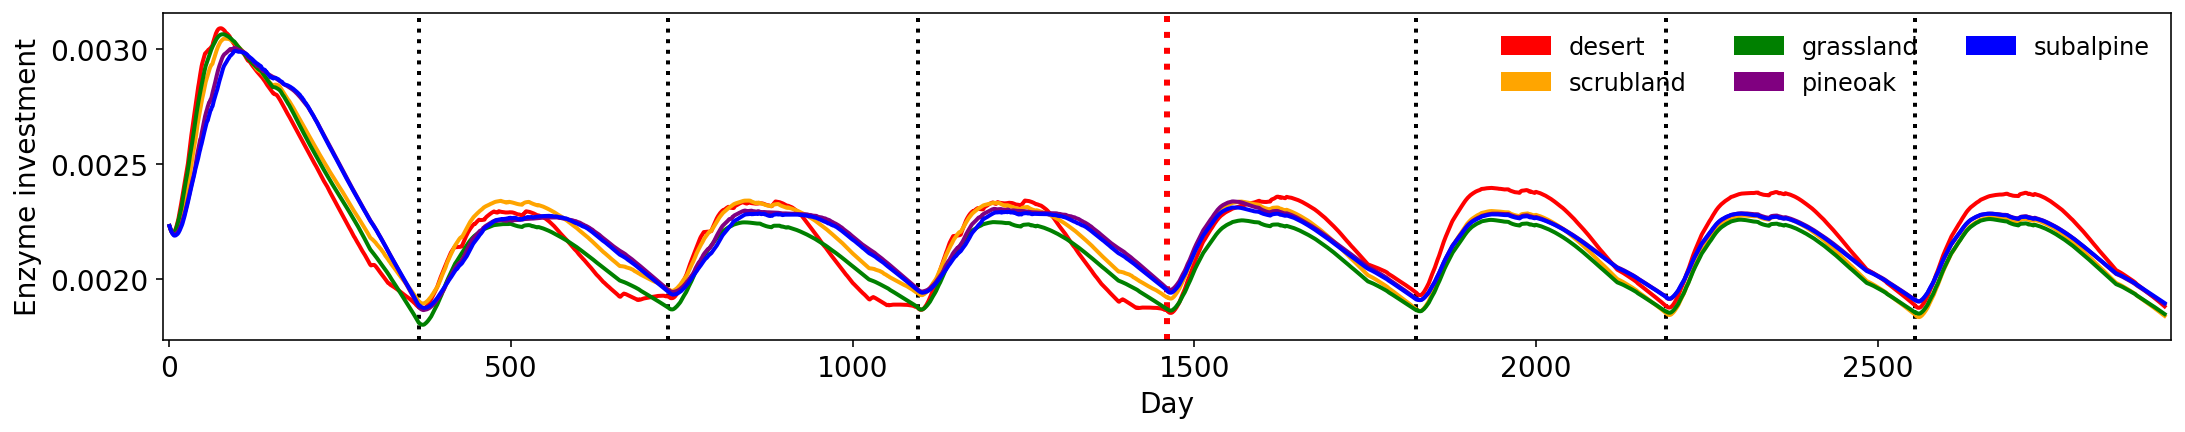

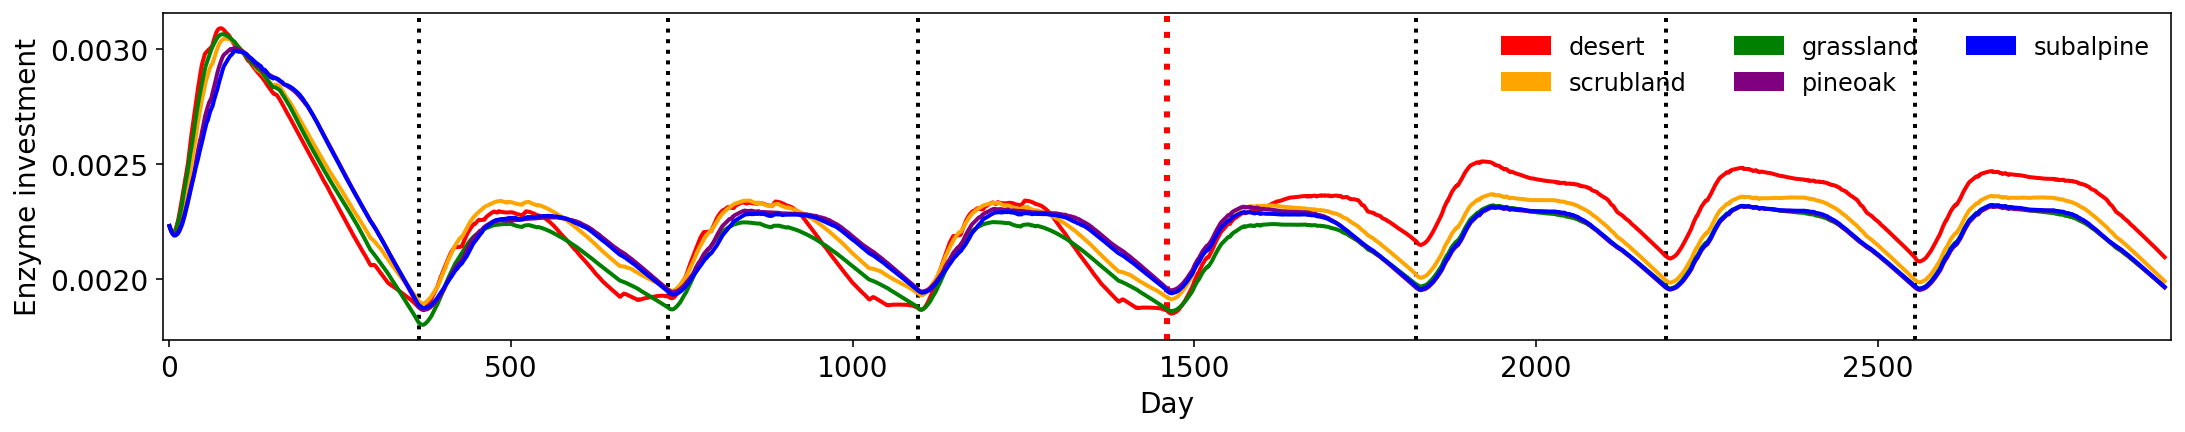

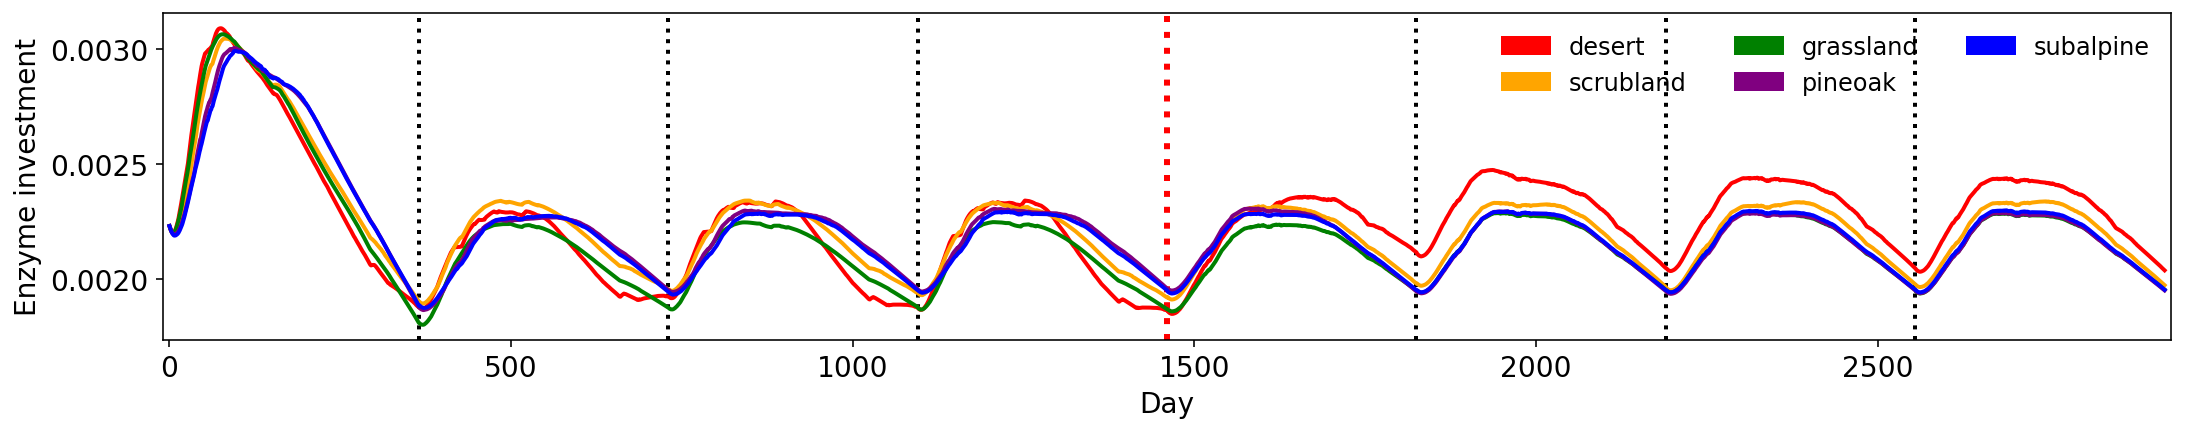

In [33]:
for site in ['desert','scrubland','grassland','pineoak','subalpine']:
    visualize_var_site("Enz",site)

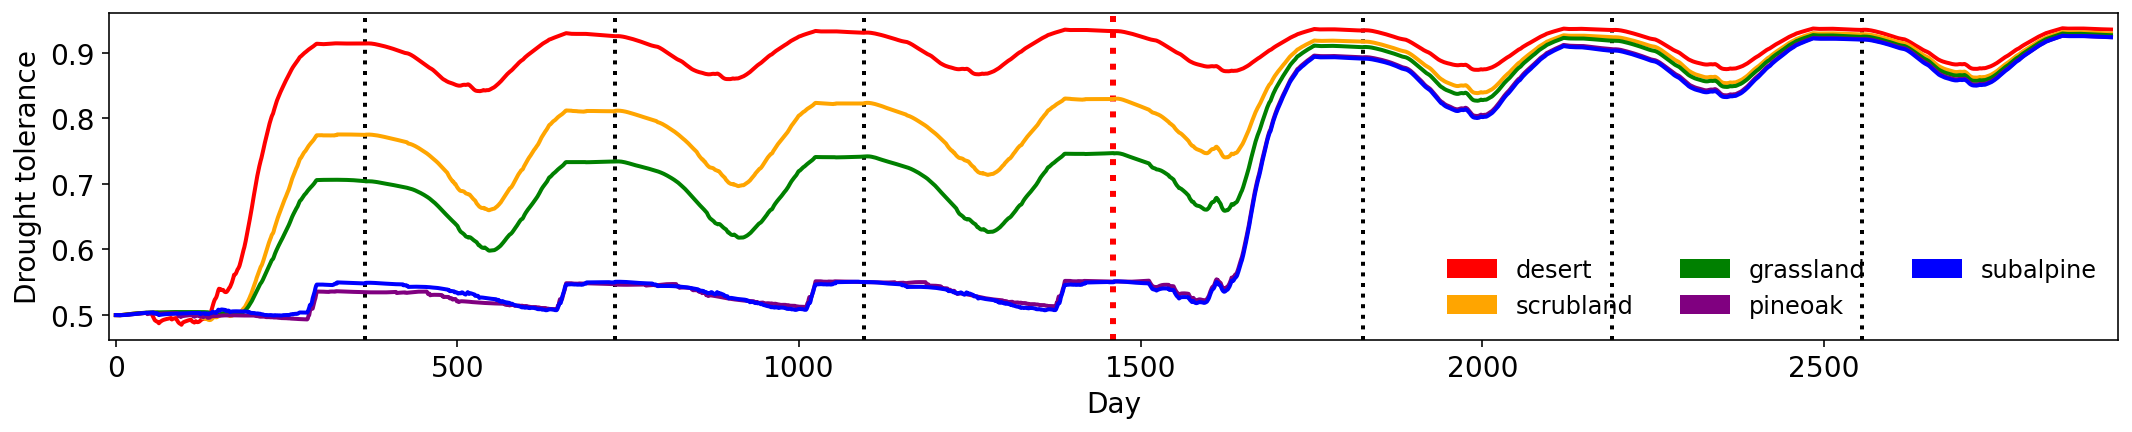

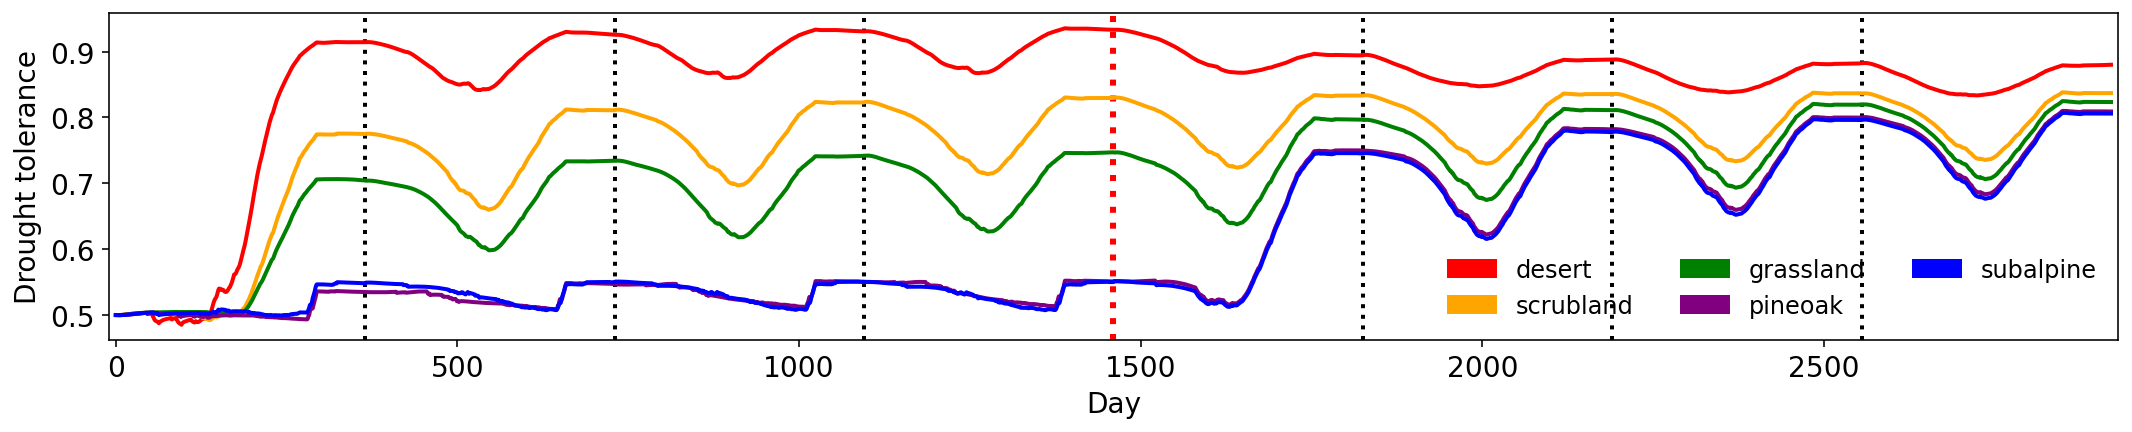

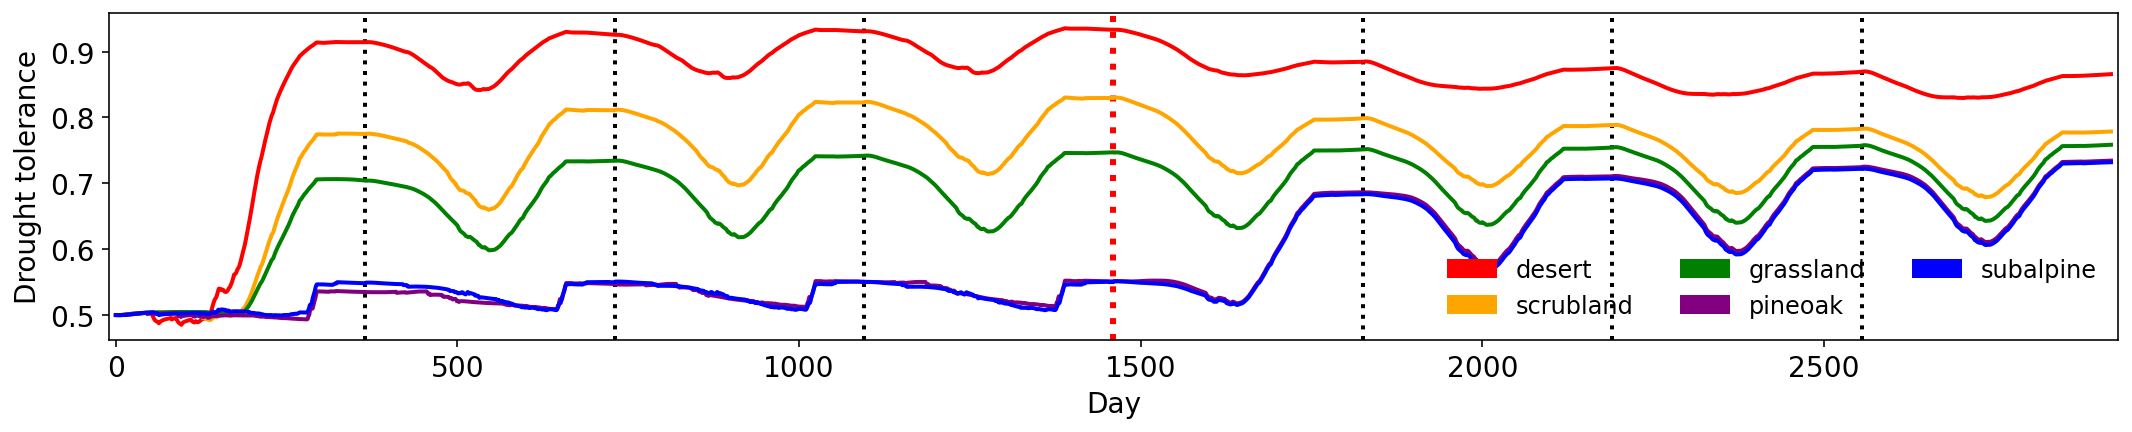

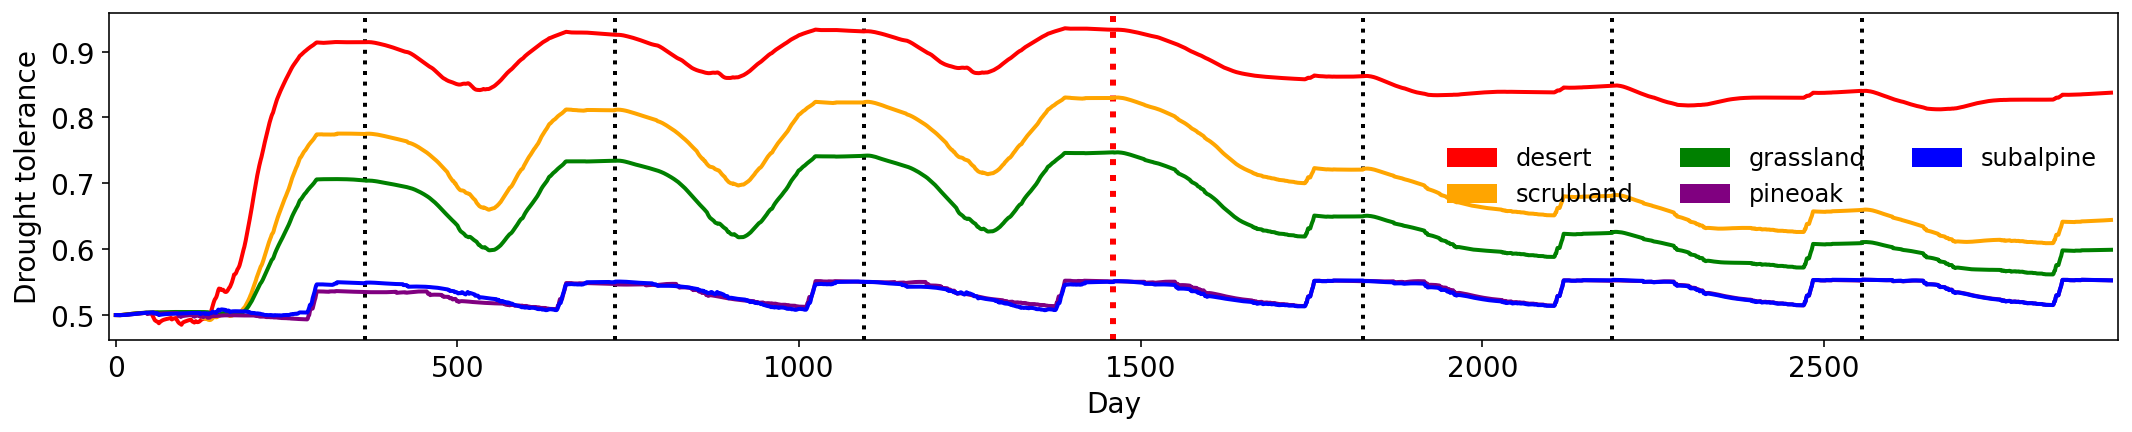

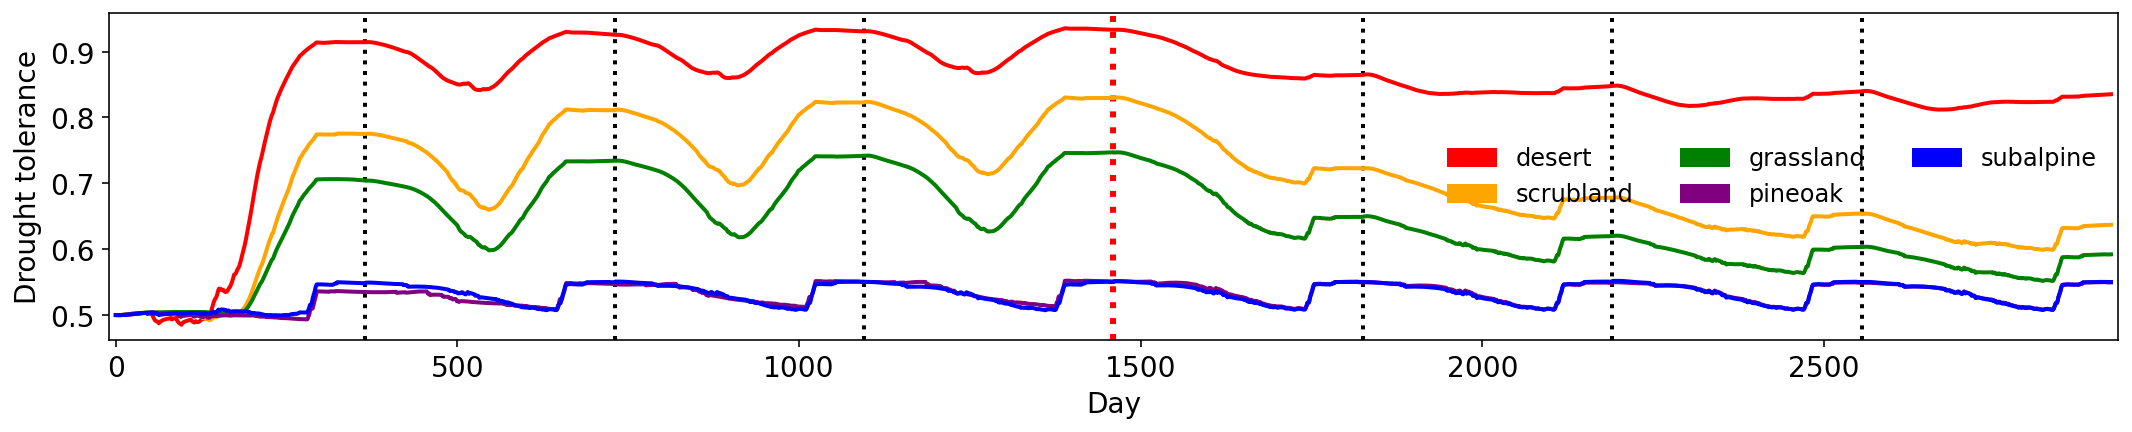

In [34]:
for site in ['desert','scrubland','grassland','pineoak','subalpine']:
    visualize_var_site("Drt",site)

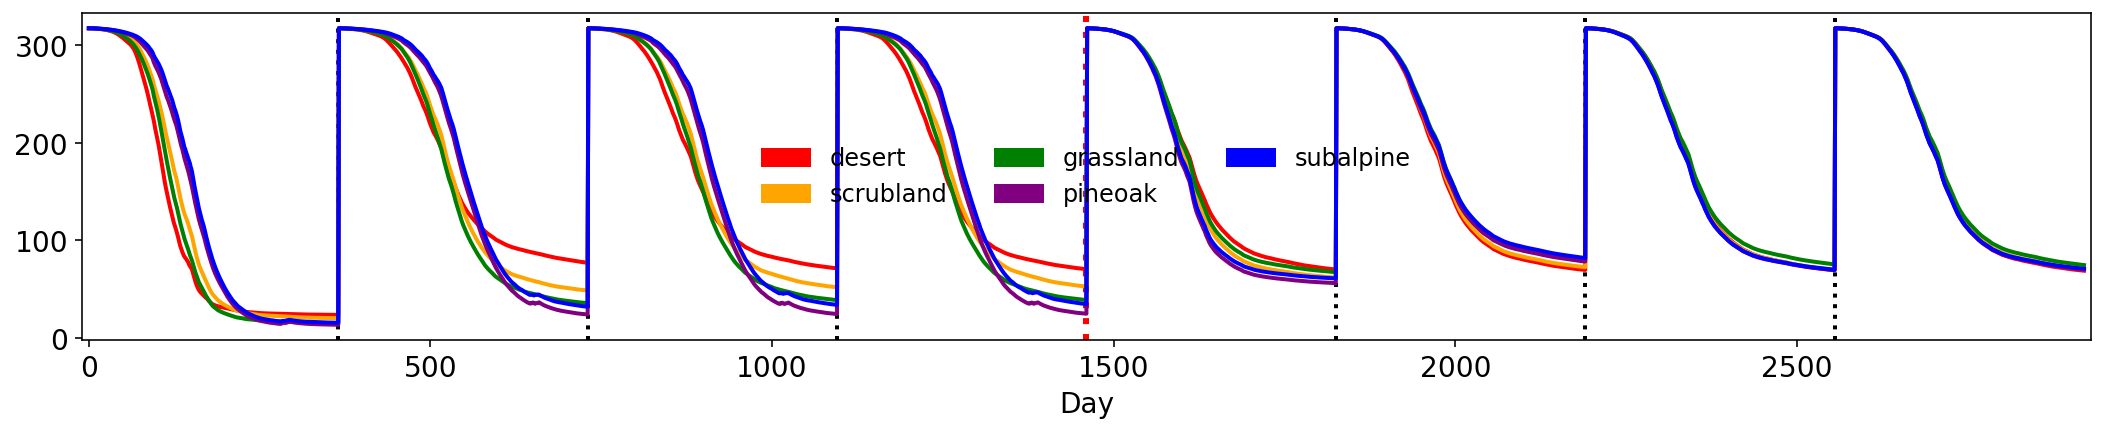

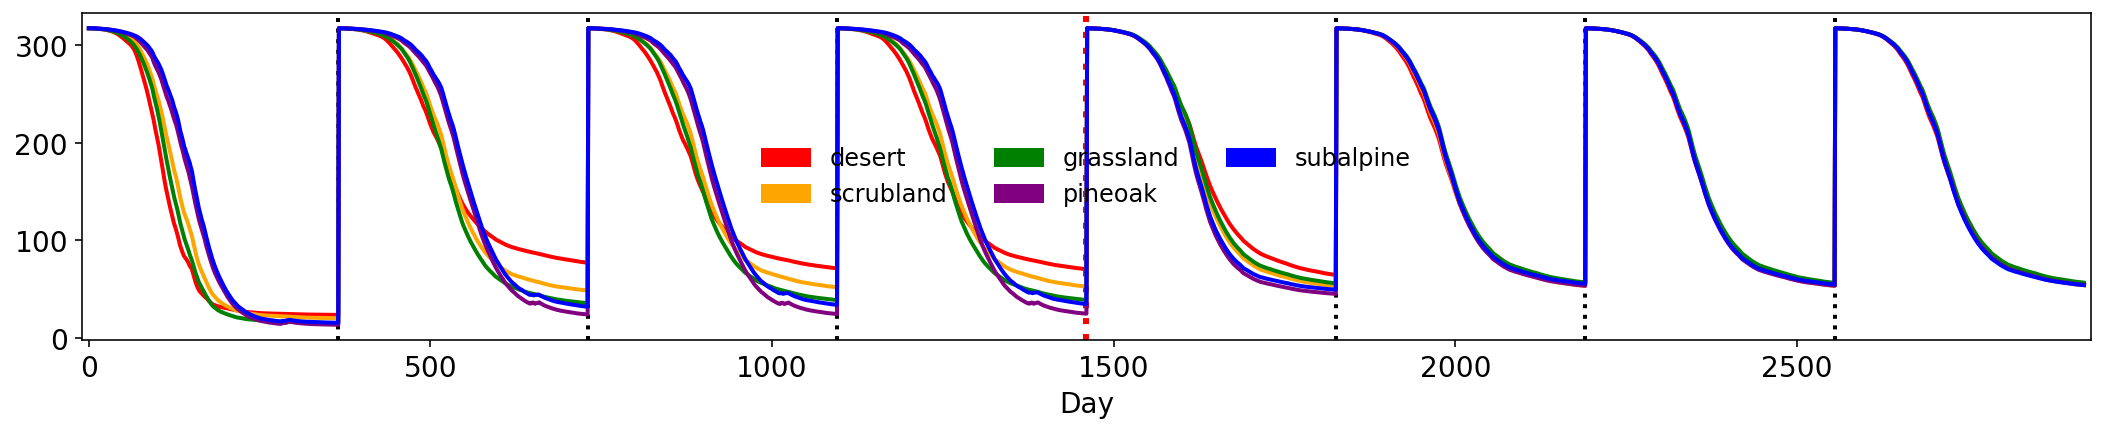

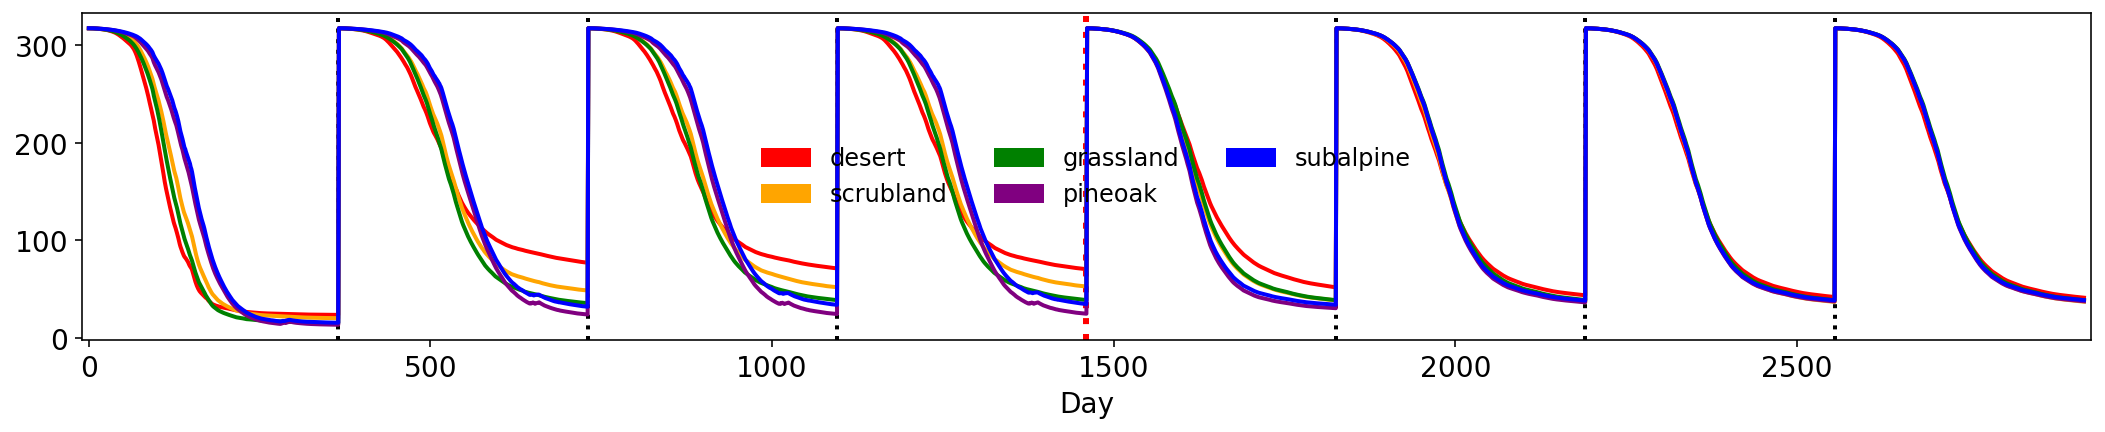

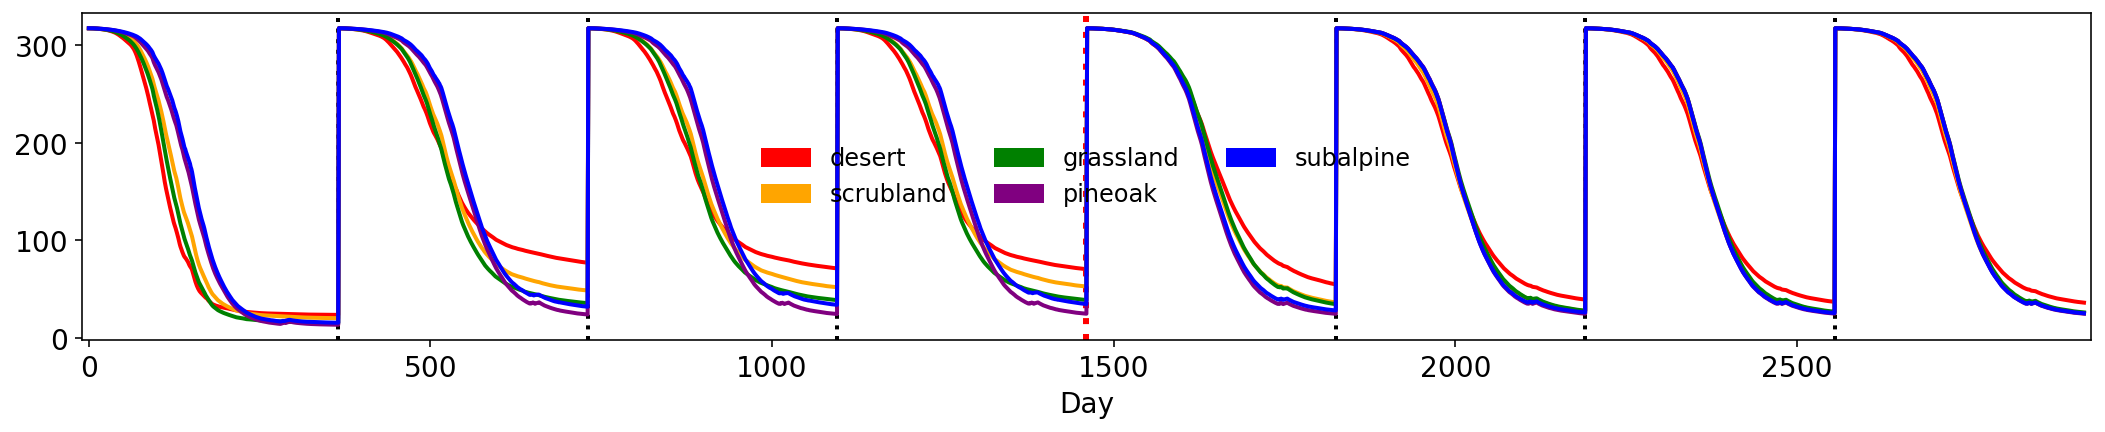

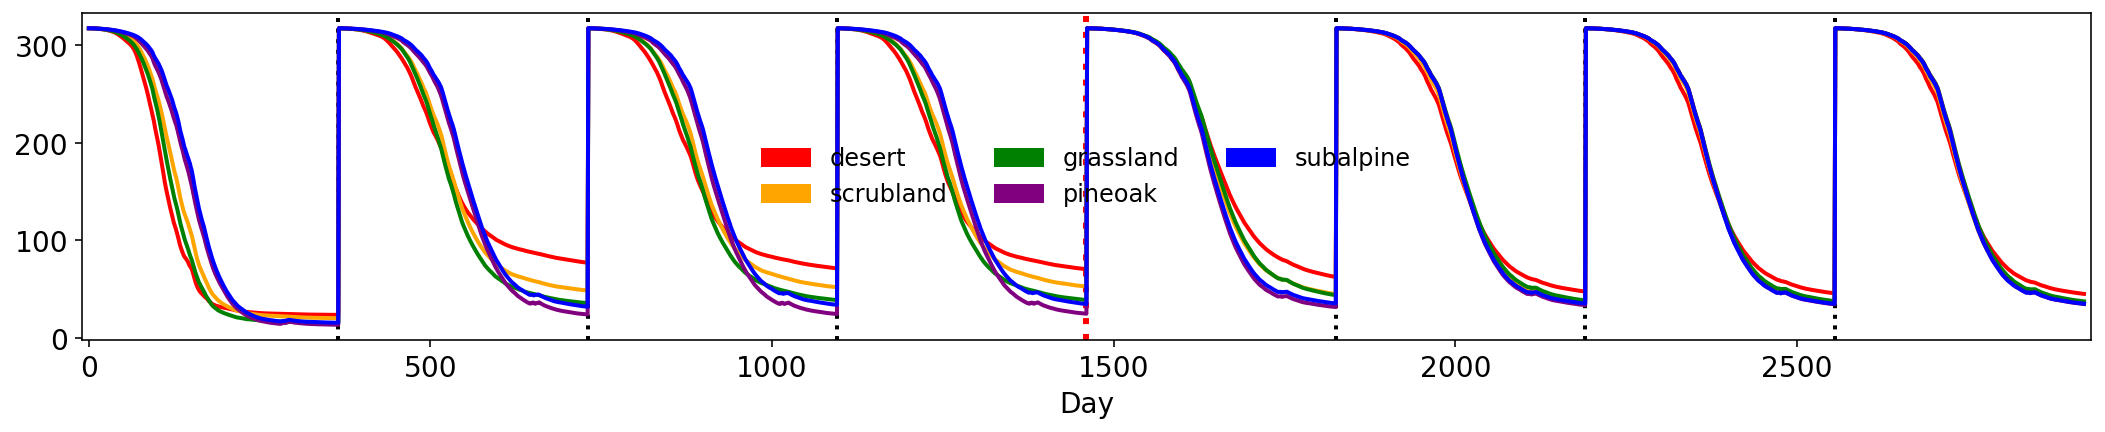

In [35]:
for site in ['desert','scrubland','grassland','pineoak','subalpine']:
    visualize_var_site("Sub",site)

In [ ]:
for site in ['desert','scrubland','grassland','pineoak','subalpine']:
    visualize_var_site("Mic",site)

## traits' tradeoffs

In [12]:
def fetch_var_origin(var,site):
    """
    Read and concatenate all data together by site.
    
    Parameters:
        var: string;traits
        site:string;the site where simulations are peformed
    """
    
    var_site_de = 'desert'    +'/' + var + '_' + 'desert'    + '_' + site + '.csv'
    var_site_sc = 'scrubland' +'/' + var + '_' + 'scrubland' + '_' + site + '.csv'
    var_site_gr = 'grassland' +'/' + var + '_' + 'grassland' + '_' + site + '.csv'
    var_site_pi = 'pineoak'   +'/' + var + '_' + 'pineoak'   + '_' + site + '.csv'
    var_site_su = 'subalpine' +'/' + var + '_' + 'subalpine' + '_' + site + '.csv'
    
    data_de = pd.read_csv(var_site_de,index_col=0)
    data_sc = pd.read_csv(var_site_sc,index_col=0)
    data_gr = pd.read_csv(var_site_gr,index_col=0)
    data_pi = pd.read_csv(var_site_pi,index_col=0)
    data_su = pd.read_csv(var_site_su,index_col=0)
        
    average = True
    
    if average == False:
        
        data = pd.concat([data_de,data_sc,data_gr,data_pi,data_su],axis=1)
        data.columns = ['desert']*20 + ['scrubland']*20 + ['grassland']*20 + ['pineoak']*20 + ['subalpine']*20
    else:
        data = pd.concat([data_de.mean(axis=1),data_sc.mean(axis=1),data_gr.mean(axis=1),
                          data_pi.mean(axis=1),data_su.mean(axis=1)],axis=1)
        data.columns = ['desert']*1 + ['scrubland']*1 + ['grassland']*1 + ['pineoak']*1 + ['subalpine']*1

    
    return data

In [13]:
desert_drt = fetch_var_origin("Drt",'desert')
desert_drt.head()

desert  scrubland  grassland   pineoak  subalpine
0  0.499522   0.499522   0.499522  0.499522   0.499522
1  0.499487   0.499487   0.499487  0.499487   0.499487
2  0.499440   0.499437   0.499439  0.499436   0.499436
3  0.499427   0.499421   0.499426  0.499416   0.499415
4  0.499405   0.499398   0.499402  0.499385   0.499380

In [14]:
desert_drt = fetch_var_origin("Drt",'desert')
desert_enz = fetch_var_origin("Enz",'desert')

scrubland_drt = fetch_var_origin("Drt",'scrubland')
scrubland_enz = fetch_var_origin("Enz",'scrubland')

grassland_drt = fetch_var_origin("Drt",'grassland')
grassland_enz = fetch_var_origin("Enz",'grassland')

pineoak_drt = fetch_var_origin("Drt",'pineoak')
pineoak_enz = fetch_var_origin("Enz",'pineoak')

subalpine_drt = fetch_var_origin("Drt",'subalpine')
subalpine_enz = fetch_var_origin("Enz",'subalpine')

## Prior to transplanting (4th yr)

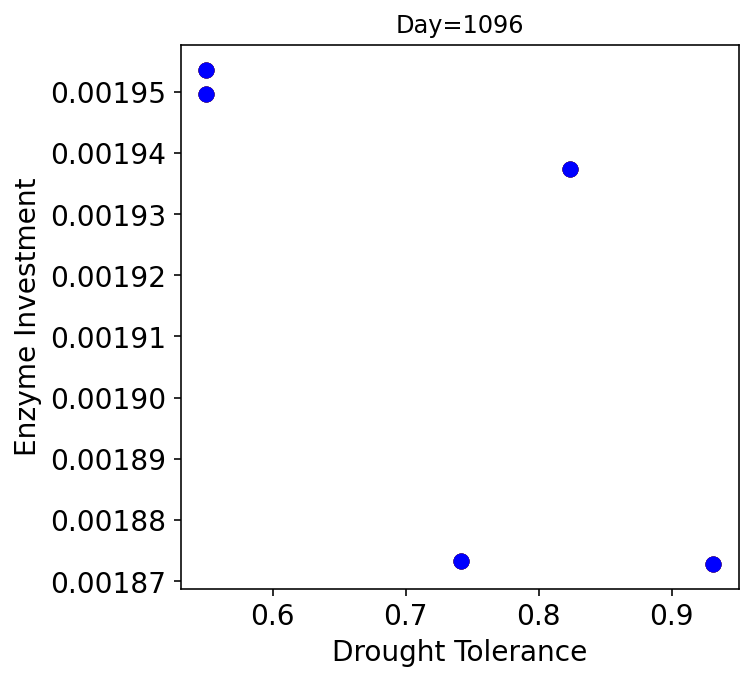

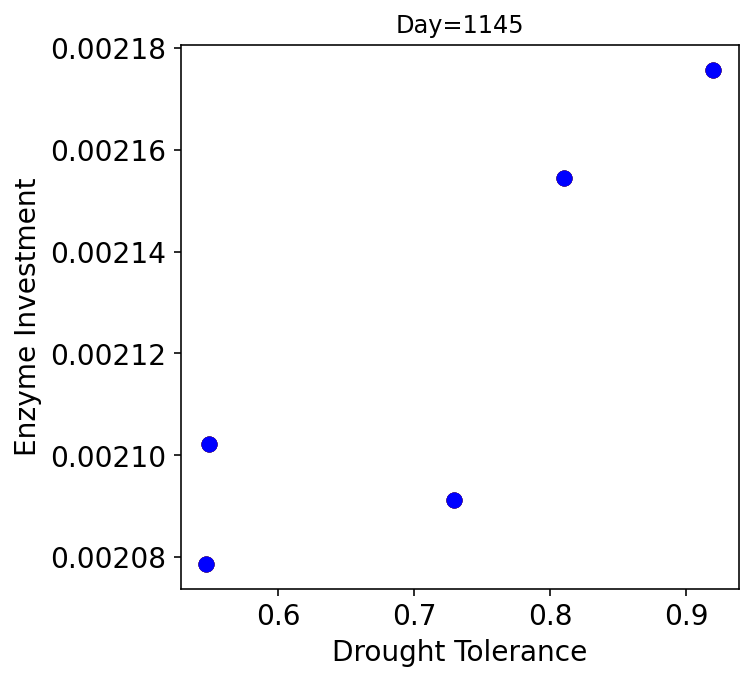

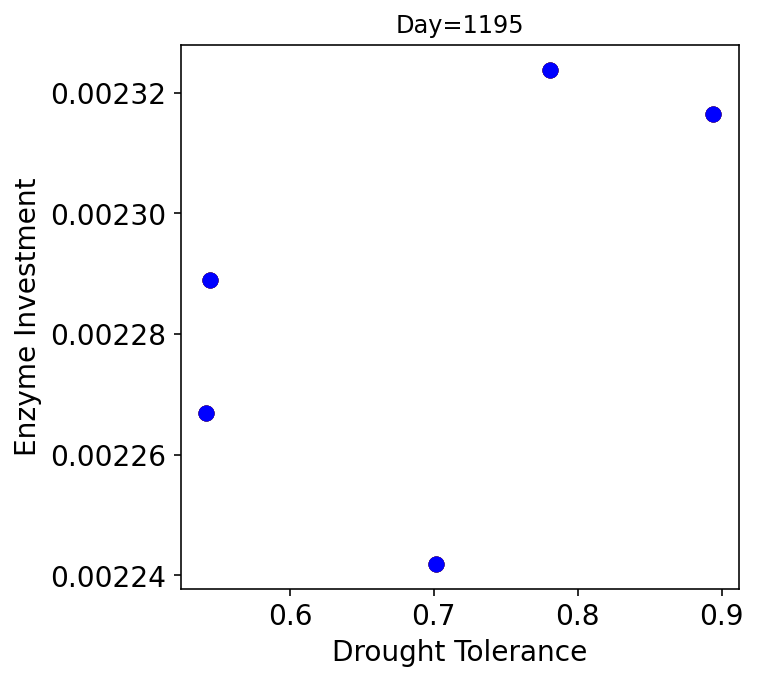

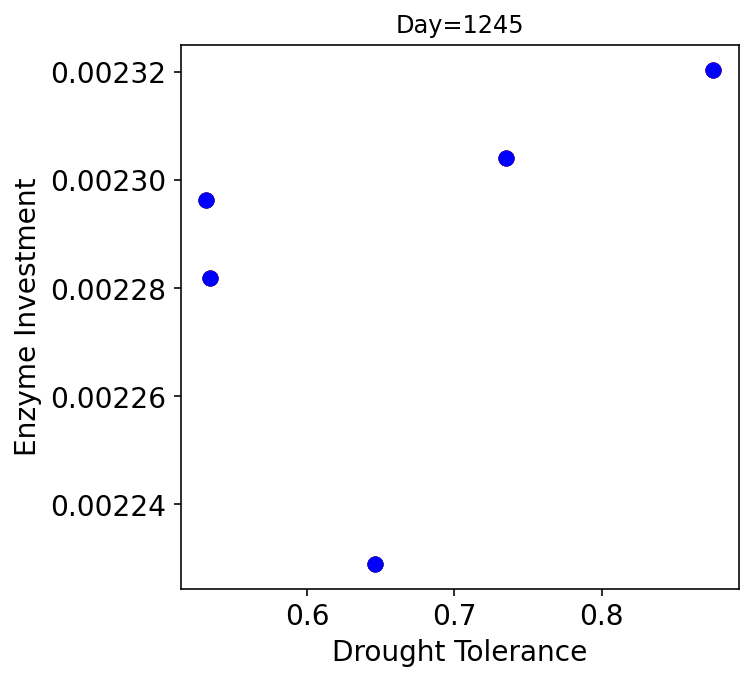

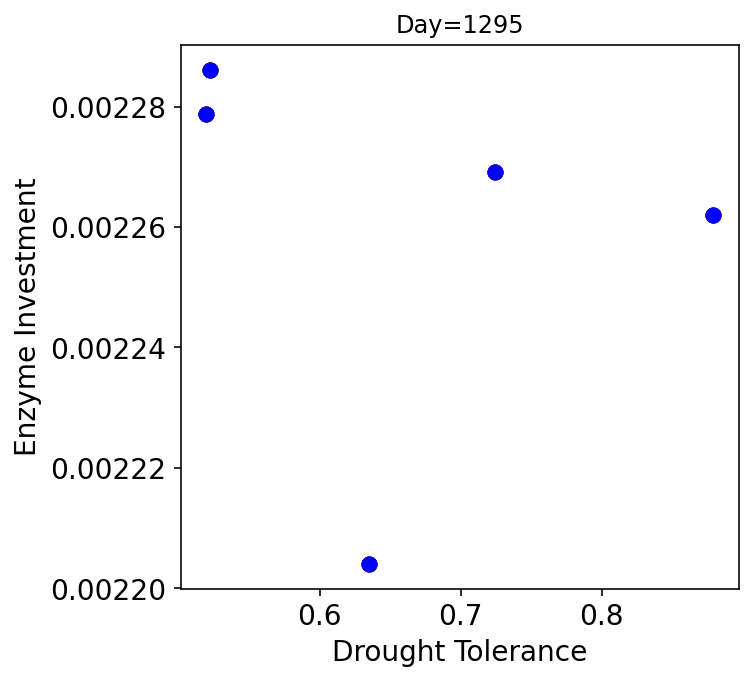

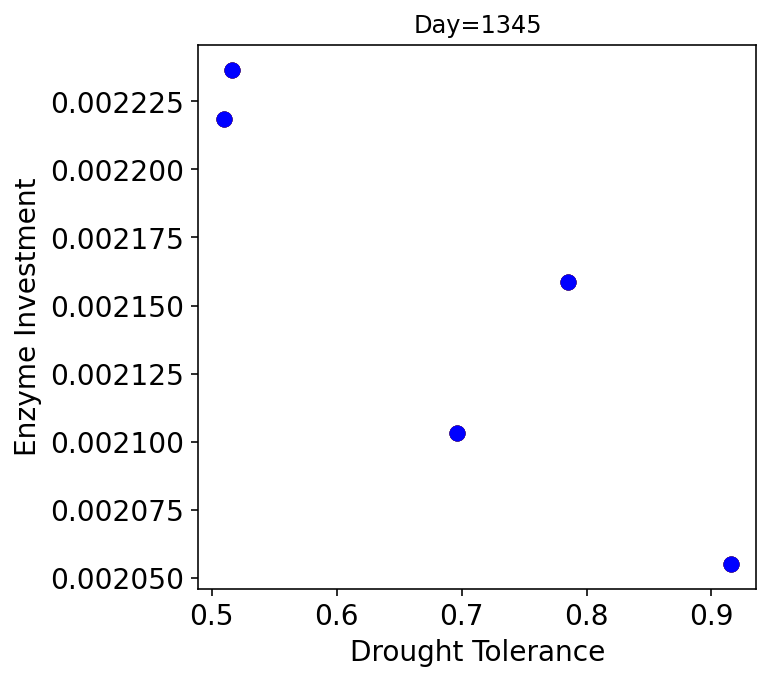

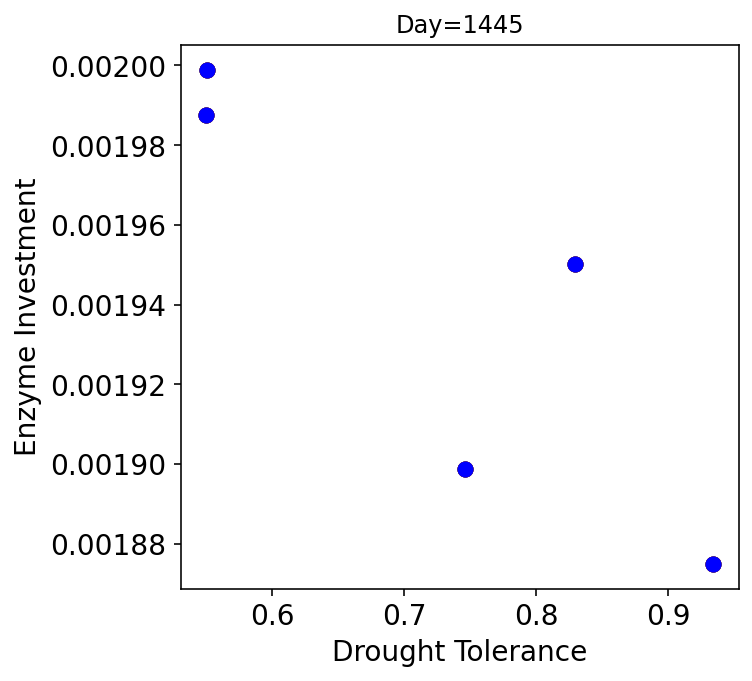

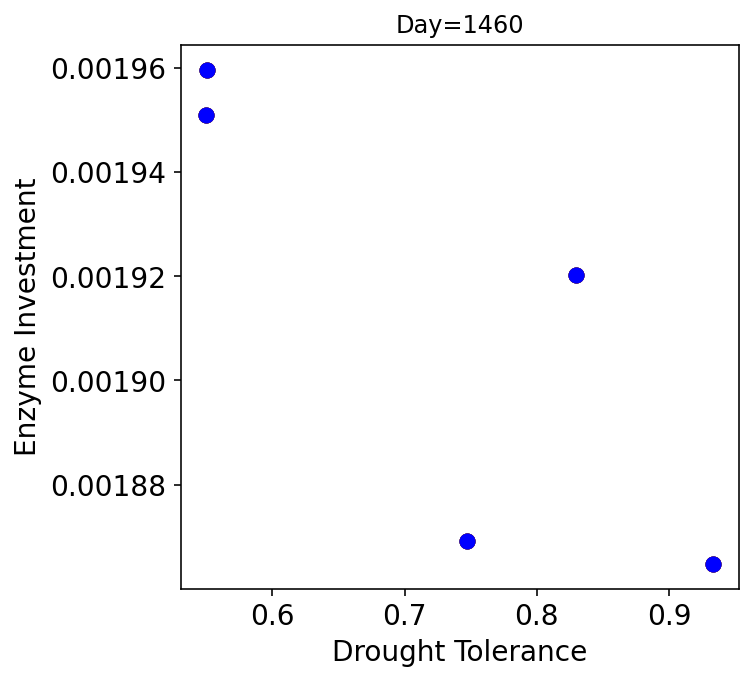

In [15]:
for day in [3*365+i for i in [1,50,100,150,200,250,350,365]]:
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)
    #ax.set_xlim(0.45,1.0)
    #ax.set_ylim(0.0015,0.0035)
    ax.set_title('Day='+str(day))
    ax.set_xlabel('Drought Tolerance',size=14)
    ax.set_ylabel('Enzyme Investment',size=14)

    ax.scatter(desert_drt.iloc[day,:],   desert_enz.iloc[day,:],      color='red',  lw=2)

    ax.scatter(scrubland_drt.iloc[day,:],scrubland_enz.iloc[day,:],   color='orange',  lw=2)

    ax.scatter(grassland_drt.iloc[day,:],grassland_enz.iloc[day,:],   color='green',  lw=2)

    ax.scatter(pineoak_drt.iloc[day,:],  pineoak_enz.iloc[day,:],     color='purple',  lw=2)

    ax.scatter(subalpine_drt.iloc[day,:], subalpine_enz.iloc[day,:],   color='blue', lw=2)

    plt.show()

## 1st year after transplanting

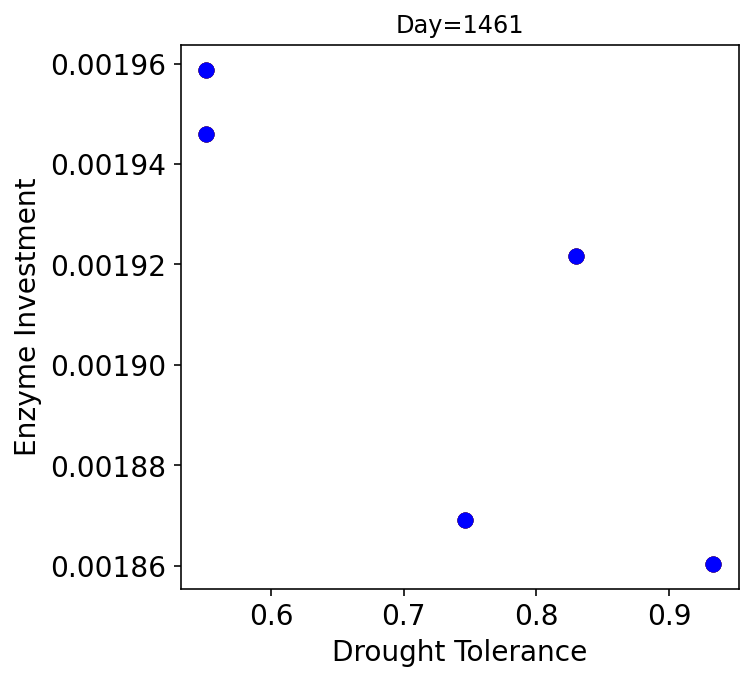

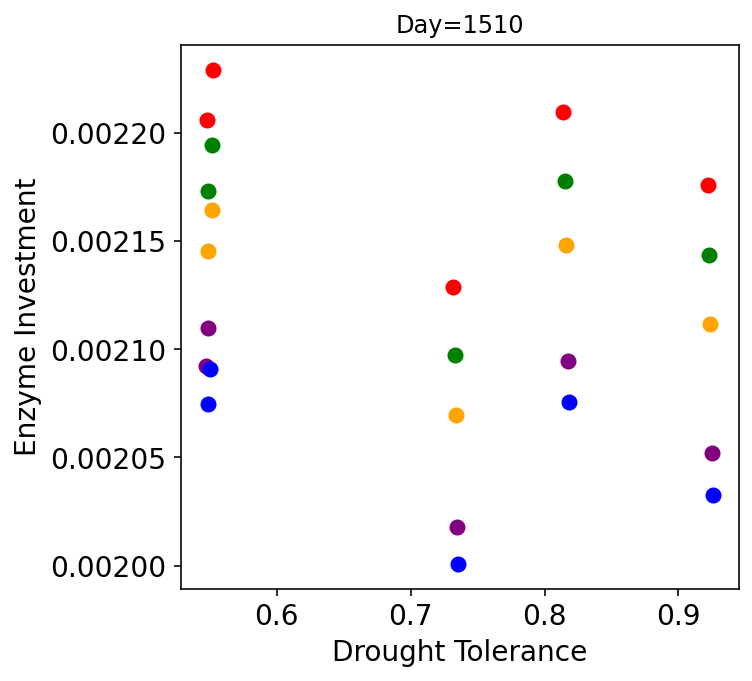

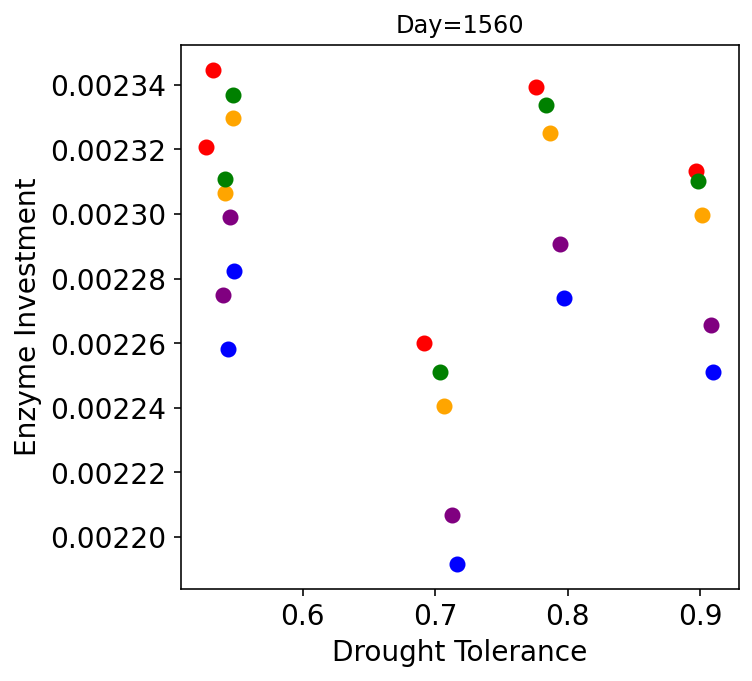

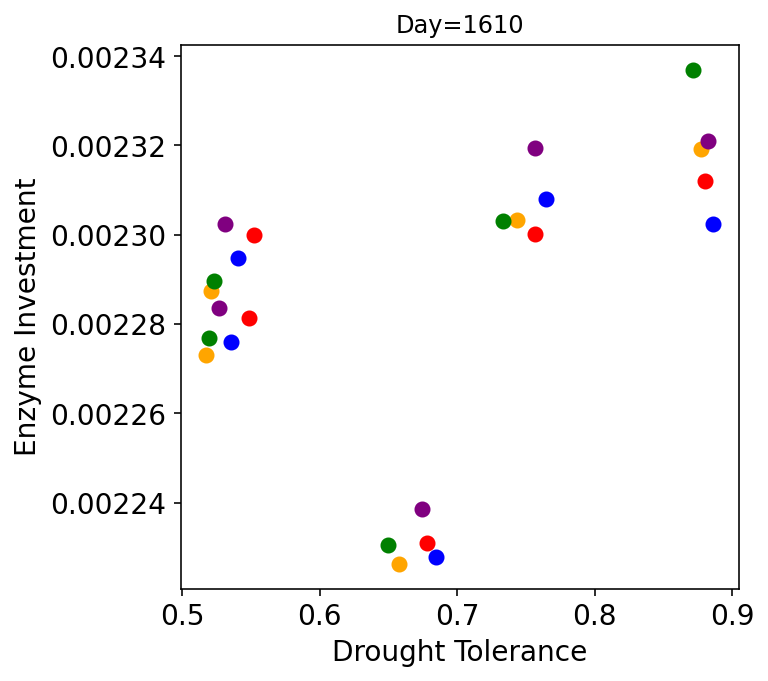

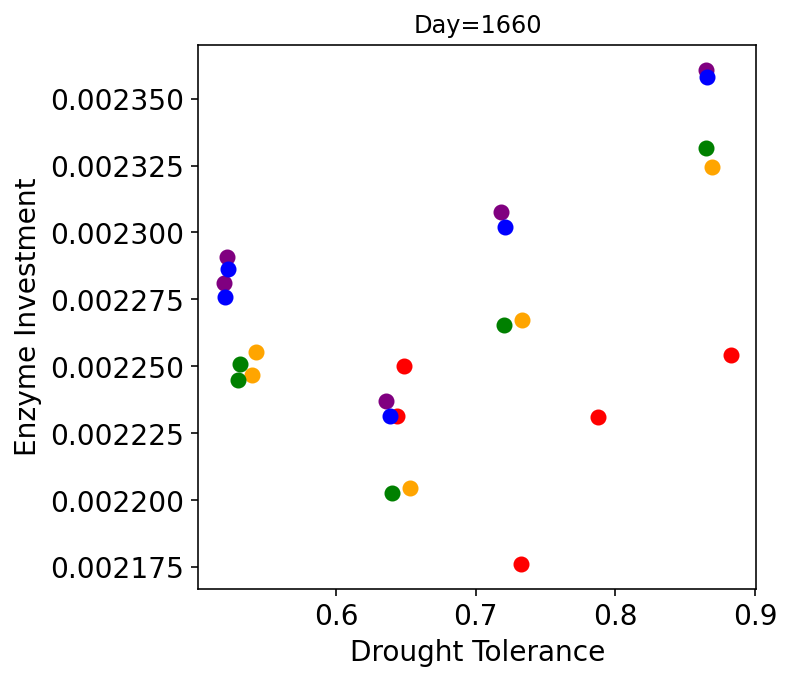

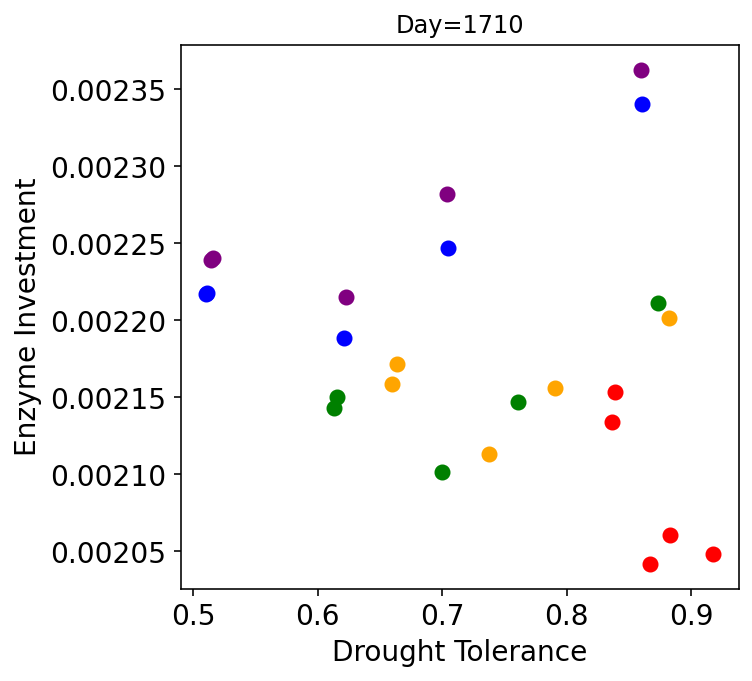

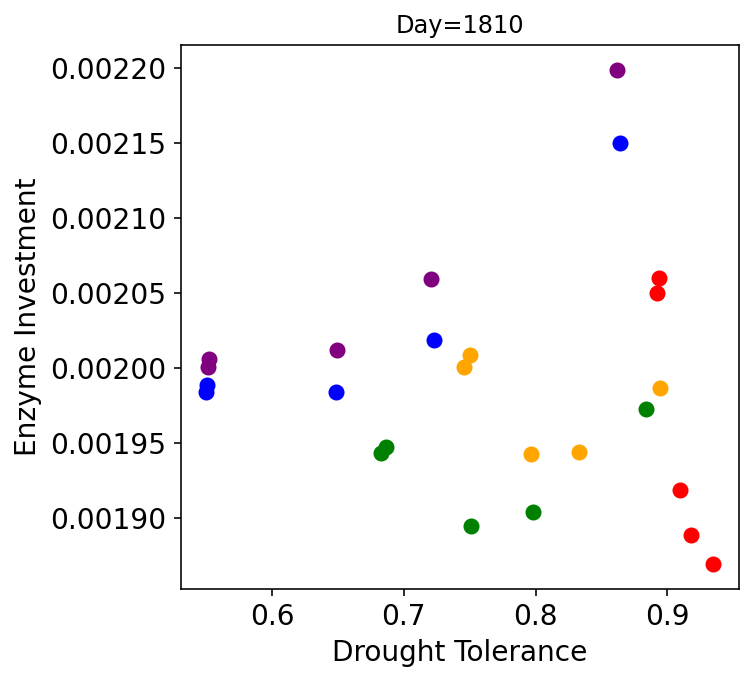

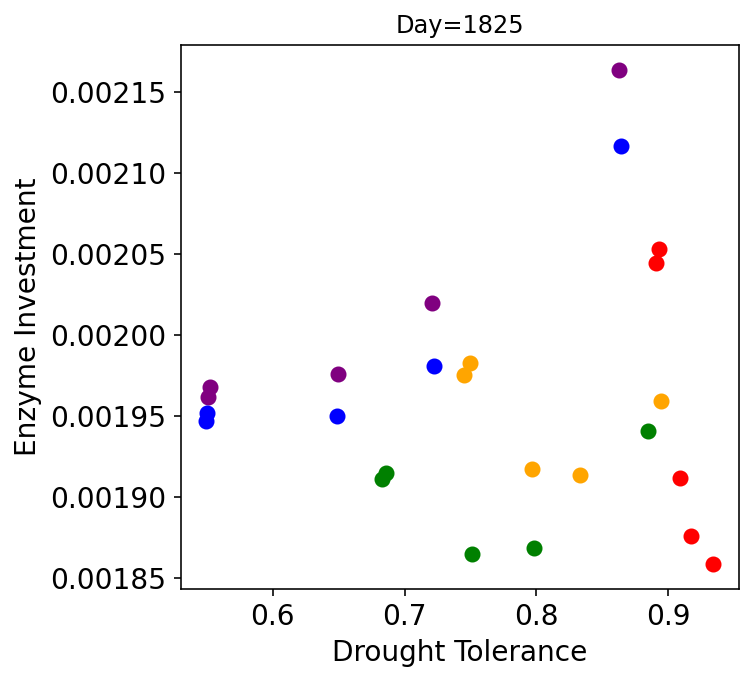

In [16]:
# first year after transplanting
for day in [4*365+1, 4*365+50, 4*365+100, 4*365+150,
            4*365+200, 4*365+250, 4*365+350, 4*365+365]:
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)
    #ax.set_xlim(0.45,1.0)
    #ax.set_ylim(0.0015,0.0035)
    ax.set_title('Day='+str(day))
    ax.set_xlabel('Drought Tolerance',size=14)
    ax.set_ylabel('Enzyme Investment',size=14)

    ax.scatter(desert_drt.iloc[day,:],   desert_enz.iloc[day,:],      color='red',  lw=2)

    ax.scatter(scrubland_drt.iloc[day,:],scrubland_enz.iloc[day,:],   color='orange',  lw=2)

    ax.scatter(grassland_drt.iloc[day,:],grassland_enz.iloc[day,:],   color='green',  lw=2)

    ax.scatter(pineoak_drt.iloc[day,:],  pineoak_enz.iloc[day,:],     color='purple',  lw=2)

    ax.scatter(subalpine_drt.iloc[day,:], subalpine_enz.iloc[day,:],   color='blue', lw=2)

    plt.show()

## 3rd year after transplanting

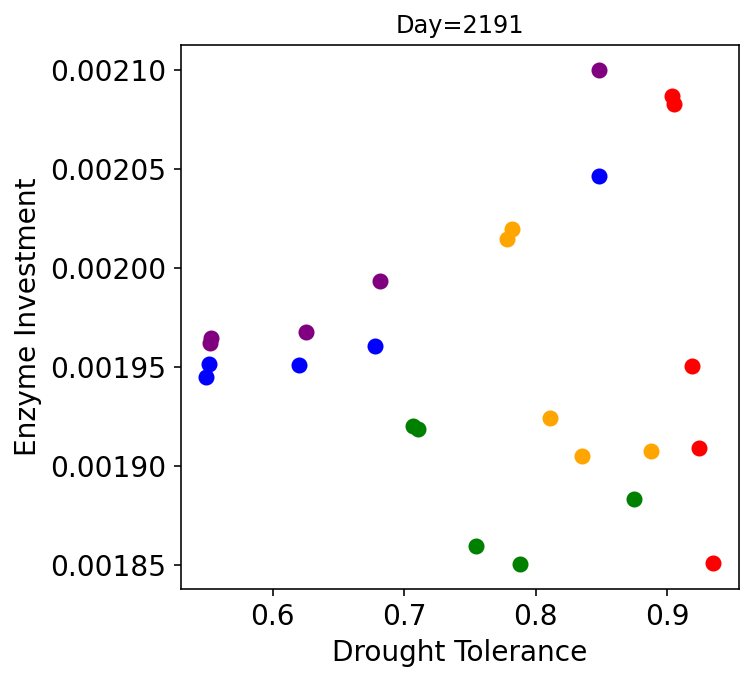

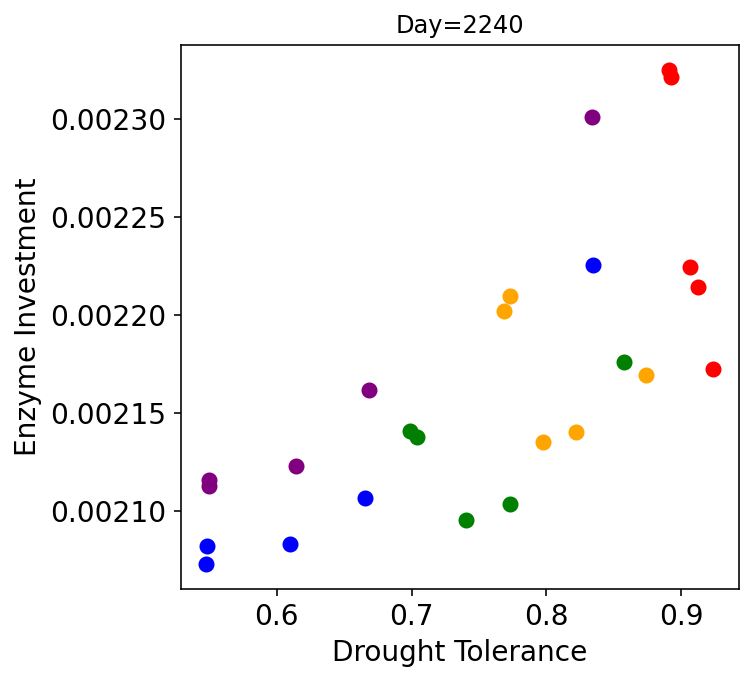

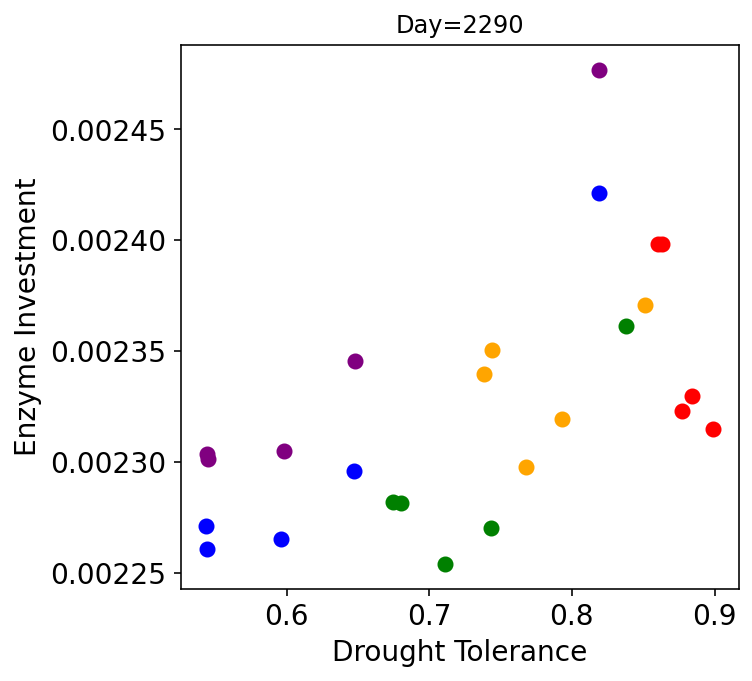

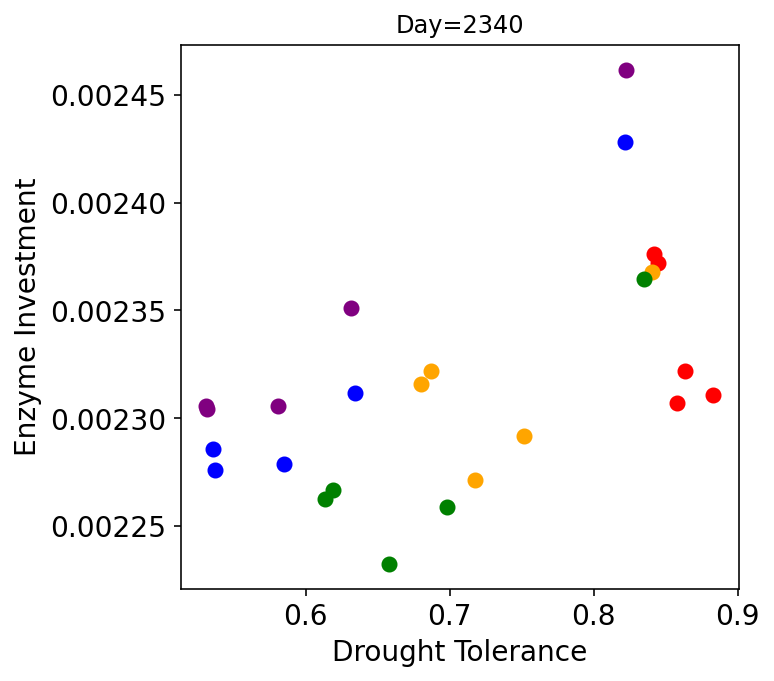

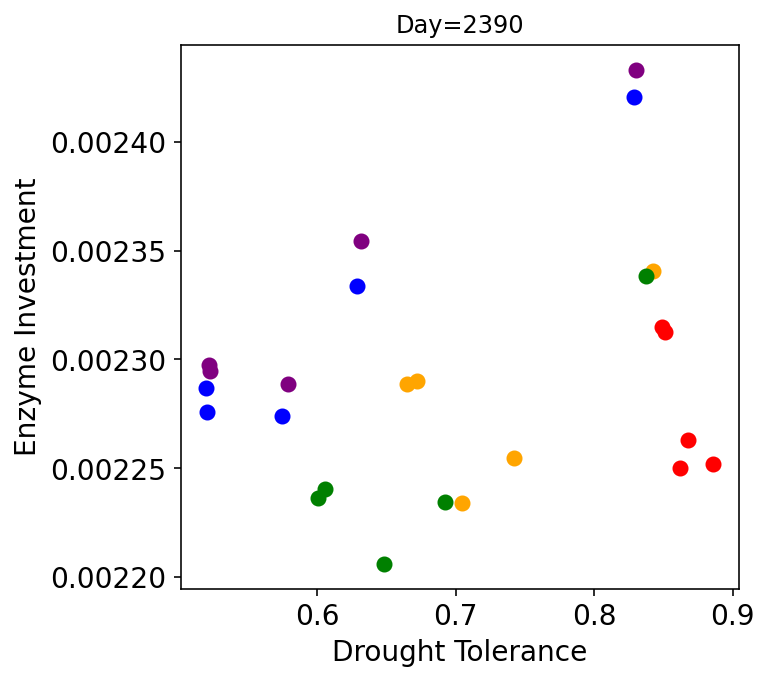

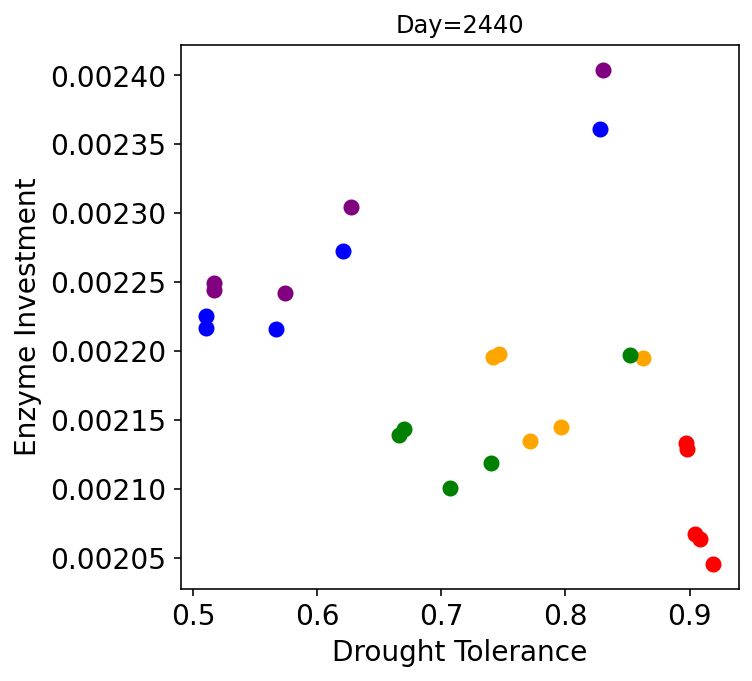

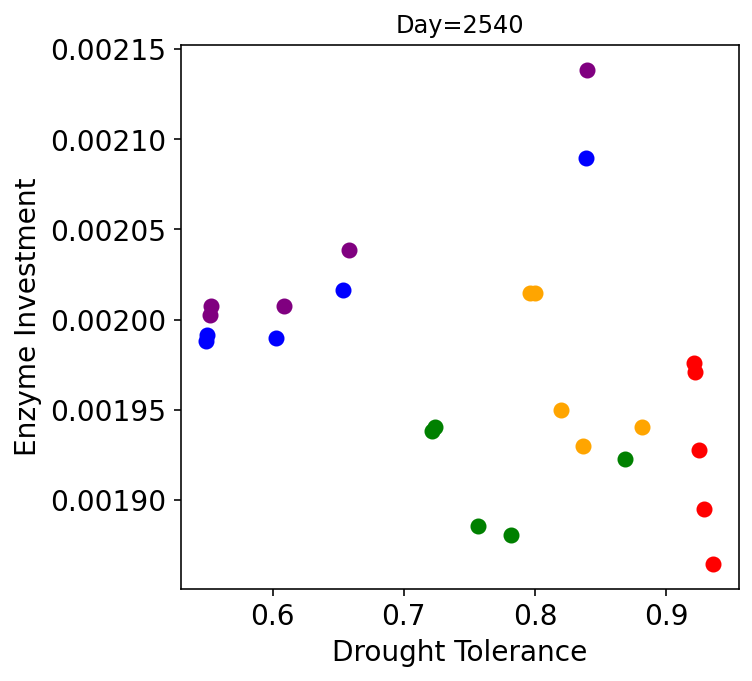

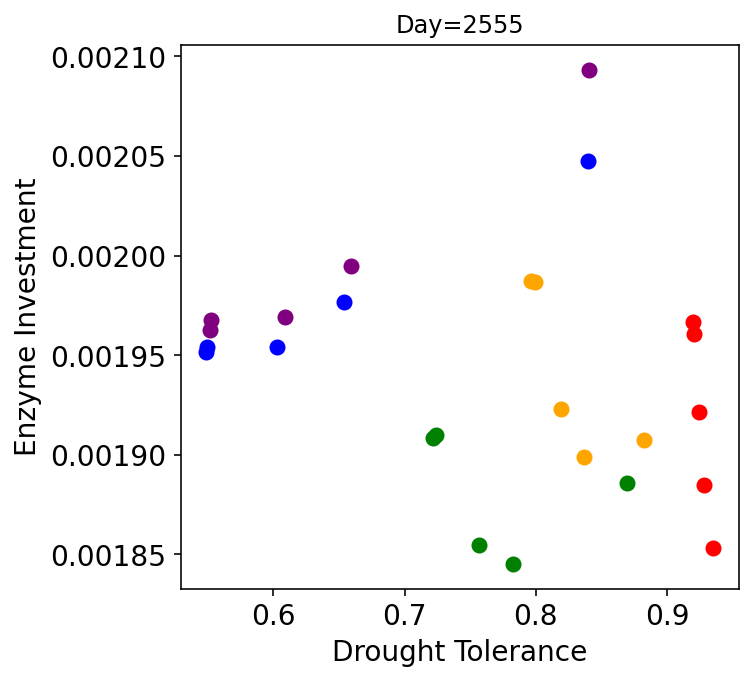

In [17]:
# 3rd year after transplanting
for day in [6*365+i for i in [1,50,100,150,200,250,350,365]]:
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)
    #ax.set_xlim(0.45,1.0)
    #ax.set_ylim(0.0015,0.0035)
    ax.set_title('Day='+str(day))
    ax.set_xlabel('Drought Tolerance',size=14)
    ax.set_ylabel('Enzyme Investment',size=14)

    ax.scatter(desert_drt.iloc[day,:],   desert_enz.iloc[day,:],      color='red',  lw=2)

    ax.scatter(scrubland_drt.iloc[day,:],scrubland_enz.iloc[day,:],   color='orange',  lw=2)

    ax.scatter(grassland_drt.iloc[day,:],grassland_enz.iloc[day,:],   color='green',  lw=2)

    ax.scatter(pineoak_drt.iloc[day,:],  pineoak_enz.iloc[day,:],     color='purple',  lw=2)

    ax.scatter(subalpine_drt.iloc[day,:], subalpine_enz.iloc[day,:],   color='blue', lw=2)

    plt.show()

## 4th year after transplanting

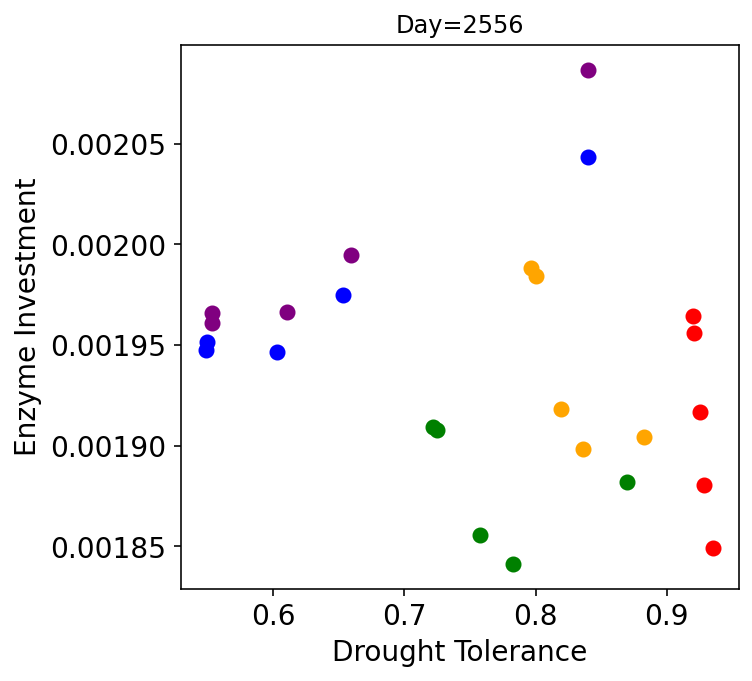

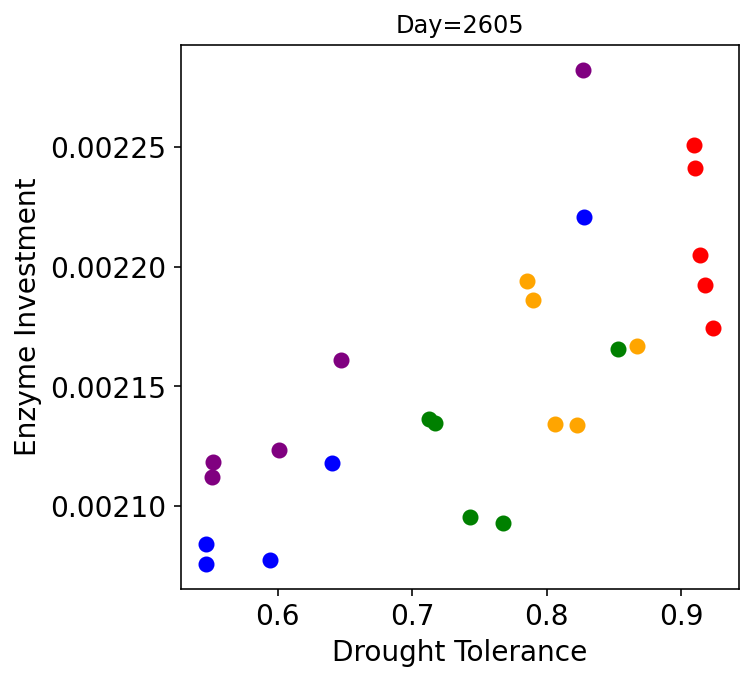

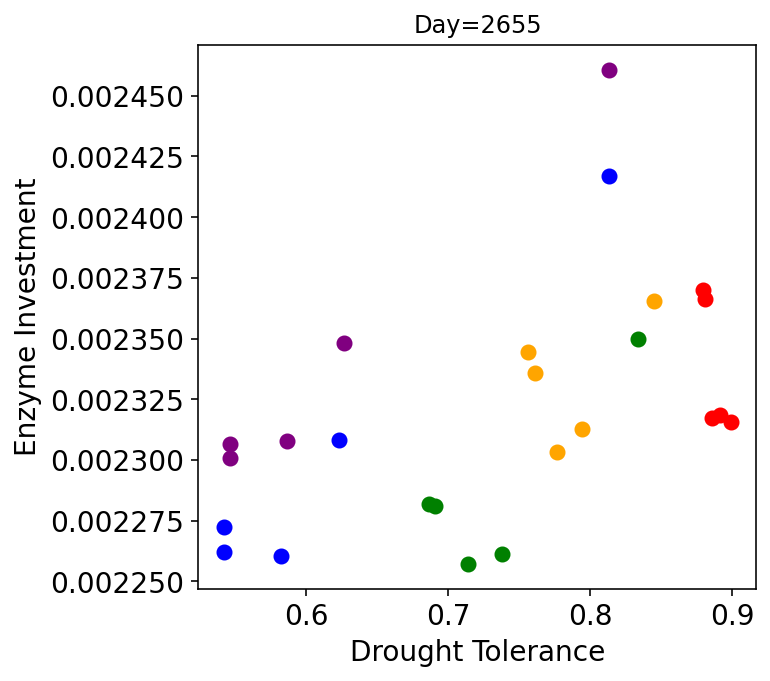

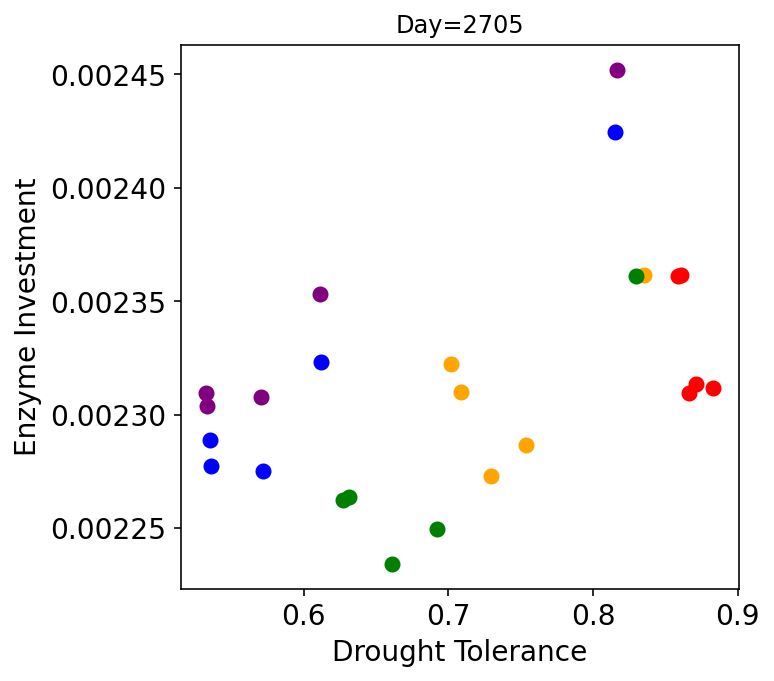

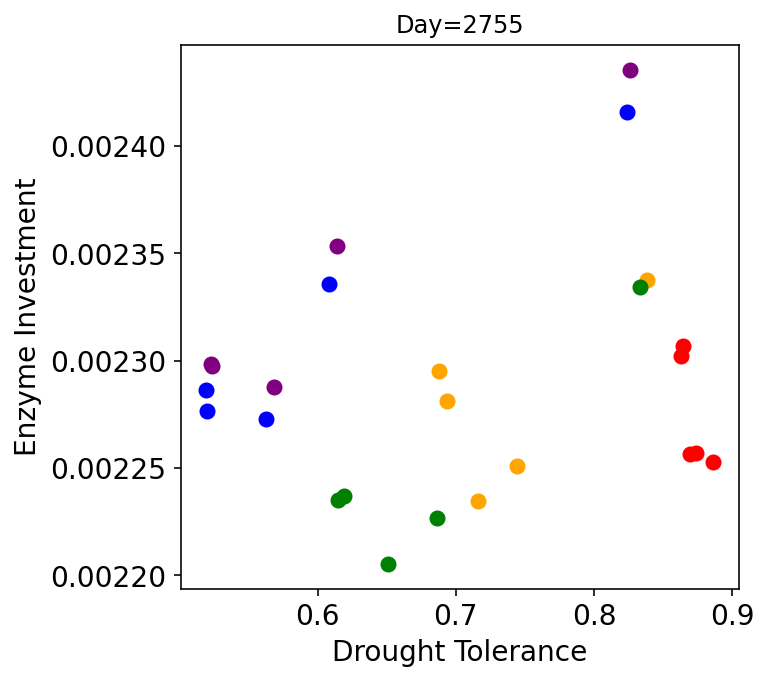

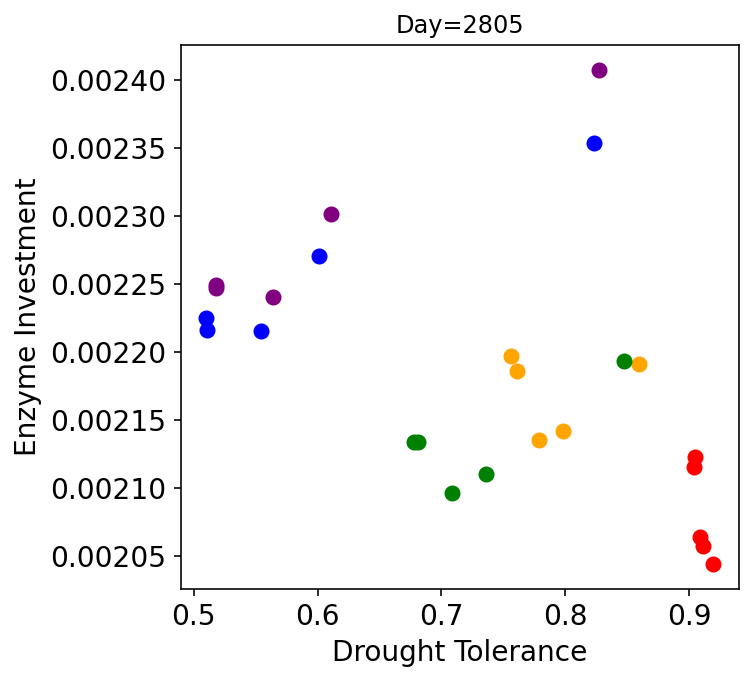

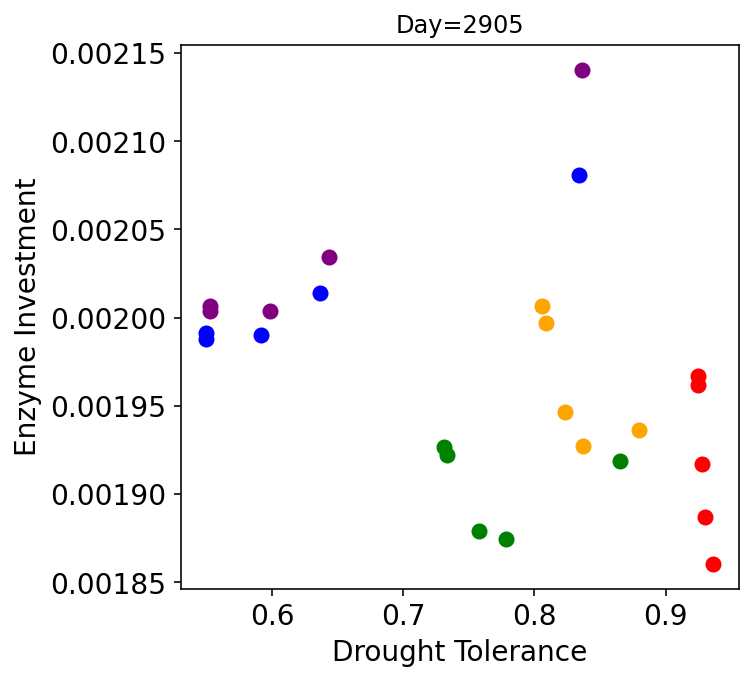

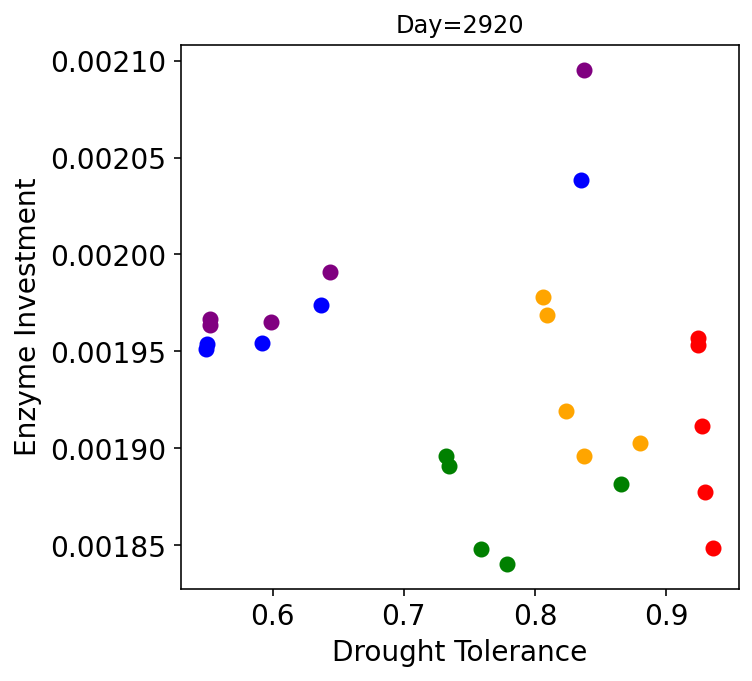

In [18]:
# 4th year after transplanting
for day in [7*365+i for i in [1,50,100,150,200,250,350,365]]:
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)
    #ax.set_xlim(0.45,1.0)
    #ax.set_ylim(0.0015,0.0035)
    ax.set_title('Day='+str(day))
    ax.set_xlabel('Drought Tolerance',size=14)
    ax.set_ylabel('Enzyme Investment',size=14)

    ax.scatter(desert_drt.iloc[day,:],   desert_enz.iloc[day,:],      color='red',  lw=2)

    ax.scatter(scrubland_drt.iloc[day,:],scrubland_enz.iloc[day,:],   color='orange',  lw=2)

    ax.scatter(grassland_drt.iloc[day,:],grassland_enz.iloc[day,:],   color='green',  lw=2)

    ax.scatter(pineoak_drt.iloc[day,:],  pineoak_enz.iloc[day,:],     color='purple',  lw=2)

    ax.scatter(subalpine_drt.iloc[day,:], subalpine_enz.iloc[day,:],   color='blue', lw=2)

    plt.show()

## Relate tratis to decomposition

## desert

In [19]:
desert_enz = fetch_var_origin('Enz','desert')
desert_drt = fetch_var_origin('Drt','desert')
desert_decomp = fetch_var_origin('Sub','desert')/10000
desert_decomp.head()

desert   scrubland   grassland     pineoak   subalpine
0  317.506580  317.506580  317.506580  317.506580  317.506580
1  317.507551  317.507551  317.507551  317.507551  317.507551
2  317.501812  317.503481  317.502235  317.504166  317.504286
3  317.490607  317.494046  317.491504  317.496967  317.497166
4  317.472846  317.476539  317.474713  317.484316  317.485920

### transient

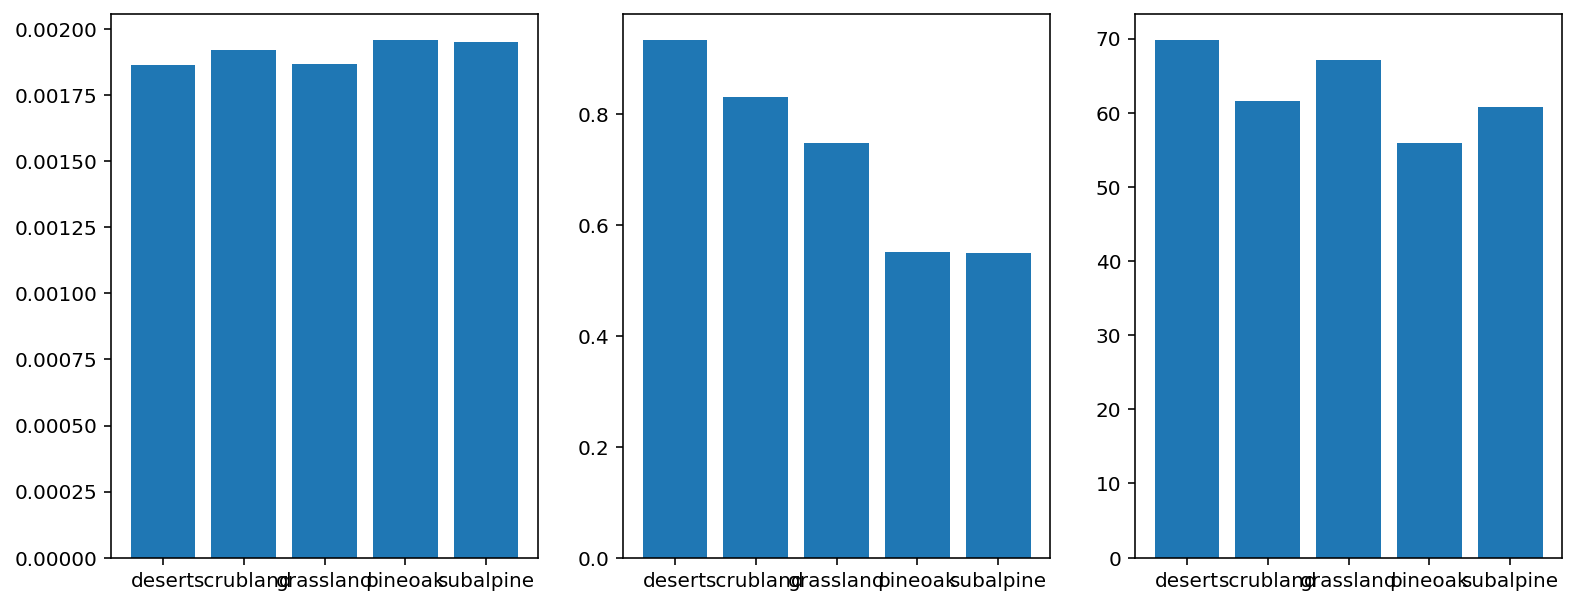

In [20]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))
#ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)
#ax.set_xlim(0.45,1.0)
#ax.set_ylim(0.0015,0.0035)
#ax.set_title('Day='+str(day))
#ax.set_xlabel('Drought Tolerance',size=14)
#ax.set_ylabel('Enzyme Investment',size=14)

ax1.bar(desert_enz.iloc[4*365,:].index,desert_enz.iloc[4*365,:])
ax2.bar(desert_drt.iloc[4*365,:].index,desert_drt.iloc[4*365,:])
ax3.bar(desert_decomp.iloc[5*365,:].index,desert_decomp.iloc[5*365,:])

plt.subplots_adjust(wspace=0.2)

plt.show()

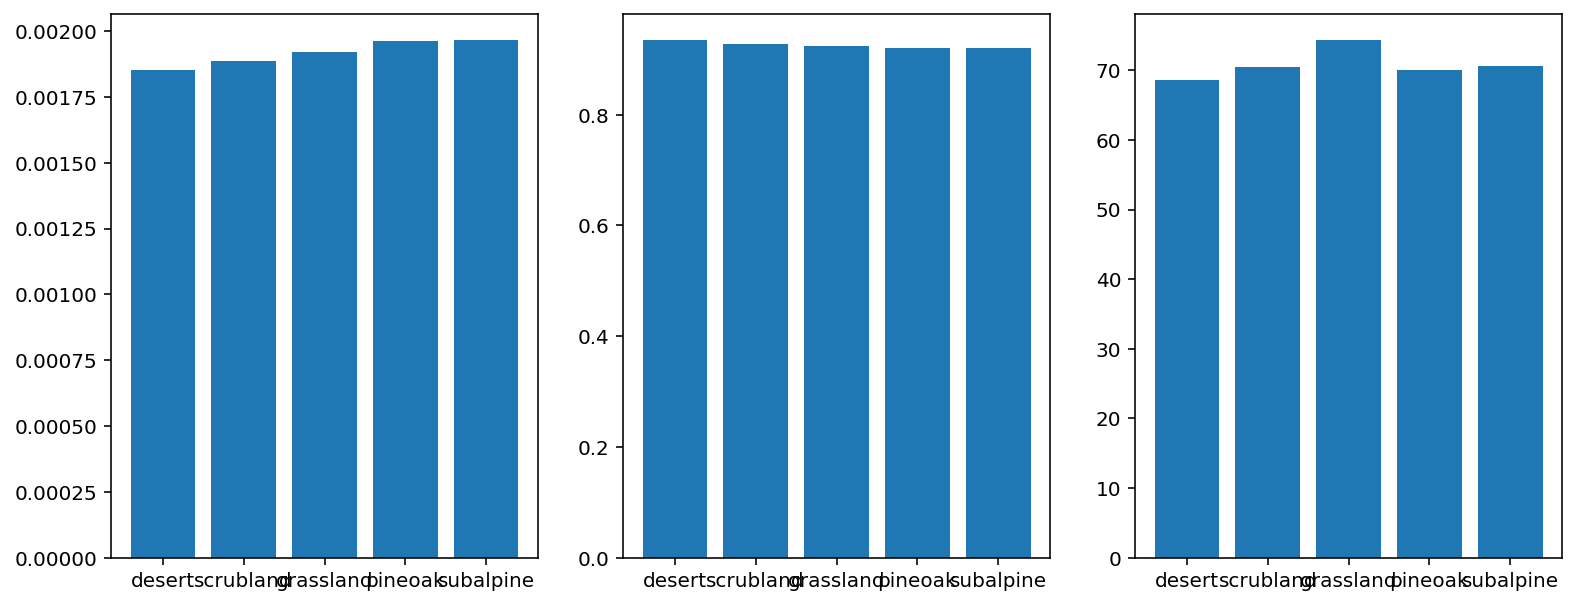

In [21]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))
#ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)
#ax.set_xlim(0.45,1.0)
#ax.set_ylim(0.0015,0.0035)
#ax.set_title('Day='+str(day))
#ax.set_xlabel('Drought Tolerance',size=14)
#ax.set_ylabel('Enzyme Investment',size=14)

ax1.bar(desert_enz.iloc[7*365,:].index,desert_enz.iloc[7*365,:])
ax2.bar(desert_drt.iloc[7*365,:].index,desert_drt.iloc[7*365,:])
ax3.bar(desert_decomp.iloc[8*365,:].index,desert_decomp.iloc[8*365,:])

plt.subplots_adjust(wspace=0.2)

plt.show()

### scrubland

In [22]:
scrubland_enz = fetch_var_origin('Enz','scrubland')
scrubland_drt = fetch_var_origin('Drt','scrubland')
scrubland_decomp = fetch_var_origin('Sub','scrubland')/10000
scrubland_decomp.head()

desert   scrubland   grassland     pineoak   subalpine
0  317.506580  317.506580  317.506580  317.506580  317.506580
1  317.507551  317.507551  317.507551  317.507551  317.507551
2  317.501812  317.503481  317.502235  317.504166  317.504286
3  317.490607  317.494046  317.491504  317.496967  317.497166
4  317.472846  317.476539  317.474713  317.484316  317.485920

## grassland

In [23]:
grassland_enz = fetch_var_origin('Enz','grassland')
grassland_drt = fetch_var_origin('Drt','grassland')
grassland_decomp = fetch_var_origin('Sub','grassland')/10000
grassland_decomp.head()

desert   scrubland   grassland     pineoak   subalpine
0  317.506580  317.506580  317.506580  317.506580  317.506580
1  317.507551  317.507551  317.507551  317.507551  317.507551
2  317.501812  317.503481  317.502235  317.504166  317.504286
3  317.490607  317.494046  317.491504  317.496967  317.497166
4  317.472846  317.476539  317.474713  317.484316  317.485920

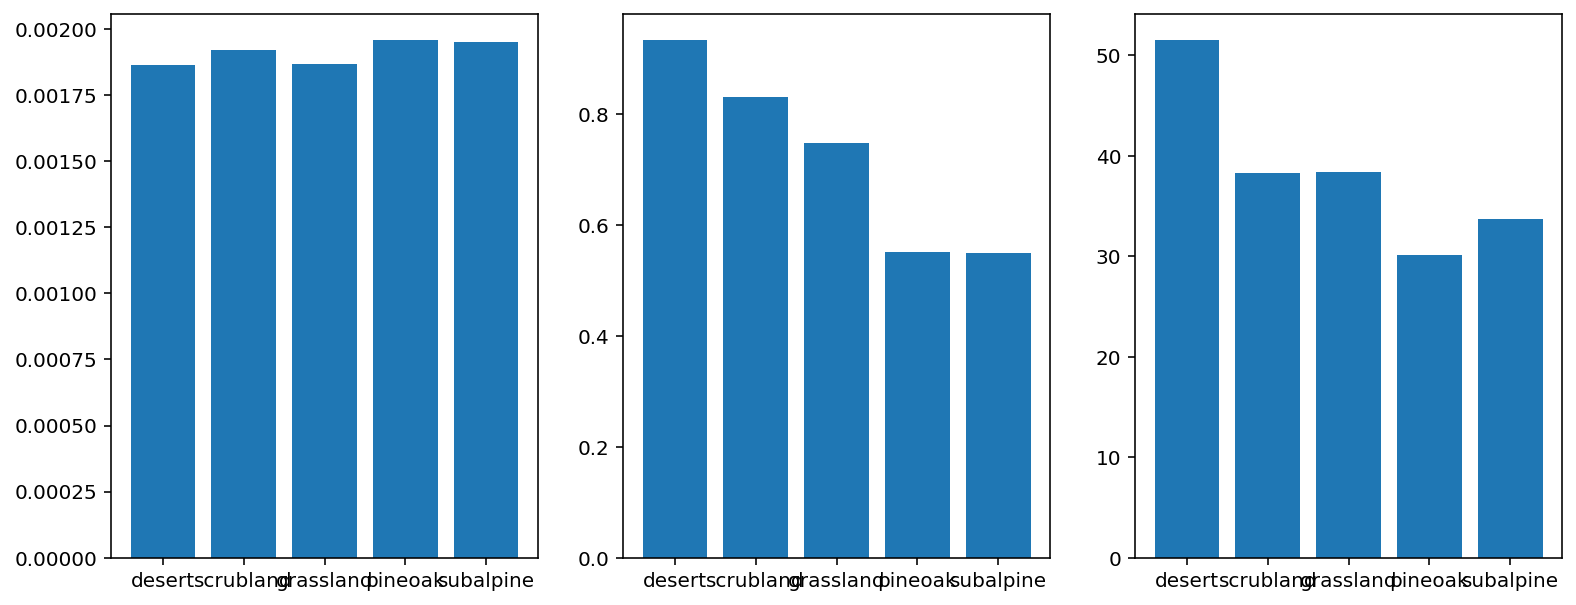

In [24]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))
#ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)
#ax.set_xlim(0.45,1.0)
#ax.set_ylim(0.0015,0.0035)
#ax.set_title('Day='+str(day))
#ax.set_xlabel('Drought Tolerance',size=14)
#ax.set_ylabel('Enzyme Investment',size=14)

ax1.bar(grassland_enz.iloc[4*365,:].index,   grassland_enz.iloc[4*365,:])
ax2.bar(grassland_drt.iloc[4*365,:].index,   grassland_drt.iloc[4*365,:])
ax3.bar(grassland_decomp.iloc[5*365,:].index,grassland_decomp.iloc[5*365,:])

plt.subplots_adjust(wspace=0.2)

plt.show()

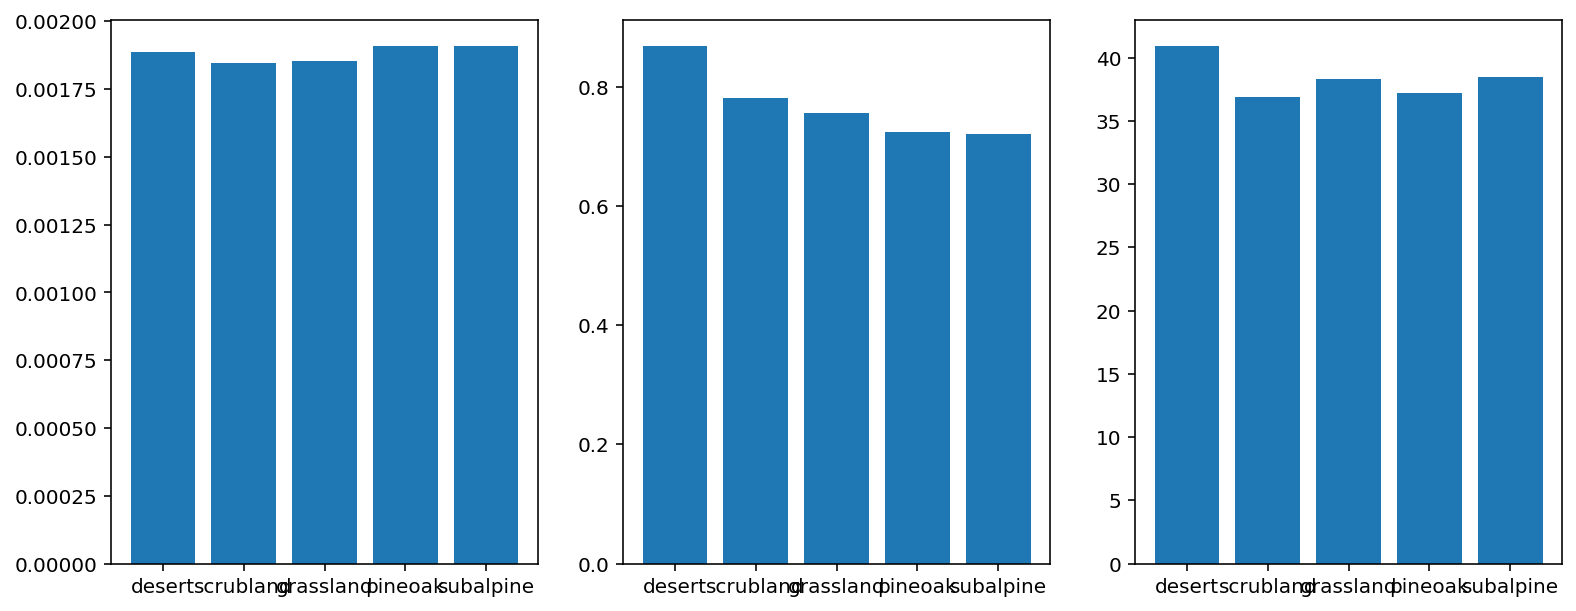

In [25]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))
#ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)
#ax.set_xlim(0.45,1.0)
#ax.set_ylim(0.0015,0.0035)
#ax.set_title('Day='+str(day))
#ax.set_xlabel('Drought Tolerance',size=14)
#ax.set_ylabel('Enzyme Investment',size=14)

ax1.bar(grassland_enz.iloc[7*365,:].index,   grassland_enz.iloc[7*365,:])
ax2.bar(grassland_drt.iloc[7*365,:].index,   grassland_drt.iloc[7*365,:])
ax3.bar(grassland_decomp.iloc[8*365,:].index,grassland_decomp.iloc[8*365,:])

plt.subplots_adjust(wspace=0.2)

plt.show()

## pineoak

In [26]:
pineoak_enz = fetch_var_origin('Enz','pineoak')
pineoak_drt = fetch_var_origin('Drt','pineoak')
pineoak_decomp = fetch_var_origin('Sub','pineoak')/10000
pineoak_decomp.head()

desert   scrubland   grassland     pineoak   subalpine
0  317.506580  317.506580  317.506580  317.506580  317.506580
1  317.507551  317.507551  317.507551  317.507551  317.507551
2  317.501812  317.503481  317.502235  317.504166  317.504286
3  317.490607  317.494046  317.491504  317.496967  317.497166
4  317.472846  317.476539  317.474713  317.484316  317.485920

## subalpine

In [27]:
subalpine_enz = fetch_var_origin('Enz','subalpine')
subalpine_drt = fetch_var_origin('Drt','subalpine')
subalpine_decomp = fetch_var_origin('Sub','subalpine')/10000
subalpine_decomp.head()

desert   scrubland   grassland     pineoak   subalpine
0  317.506580  317.506580  317.506580  317.506580  317.506580
1  317.507551  317.507551  317.507551  317.507551  317.507551
2  317.501812  317.503481  317.502235  317.504166  317.504286
3  317.490607  317.494046  317.491504  317.496967  317.497166
4  317.472846  317.476539  317.474713  317.484316  317.485920

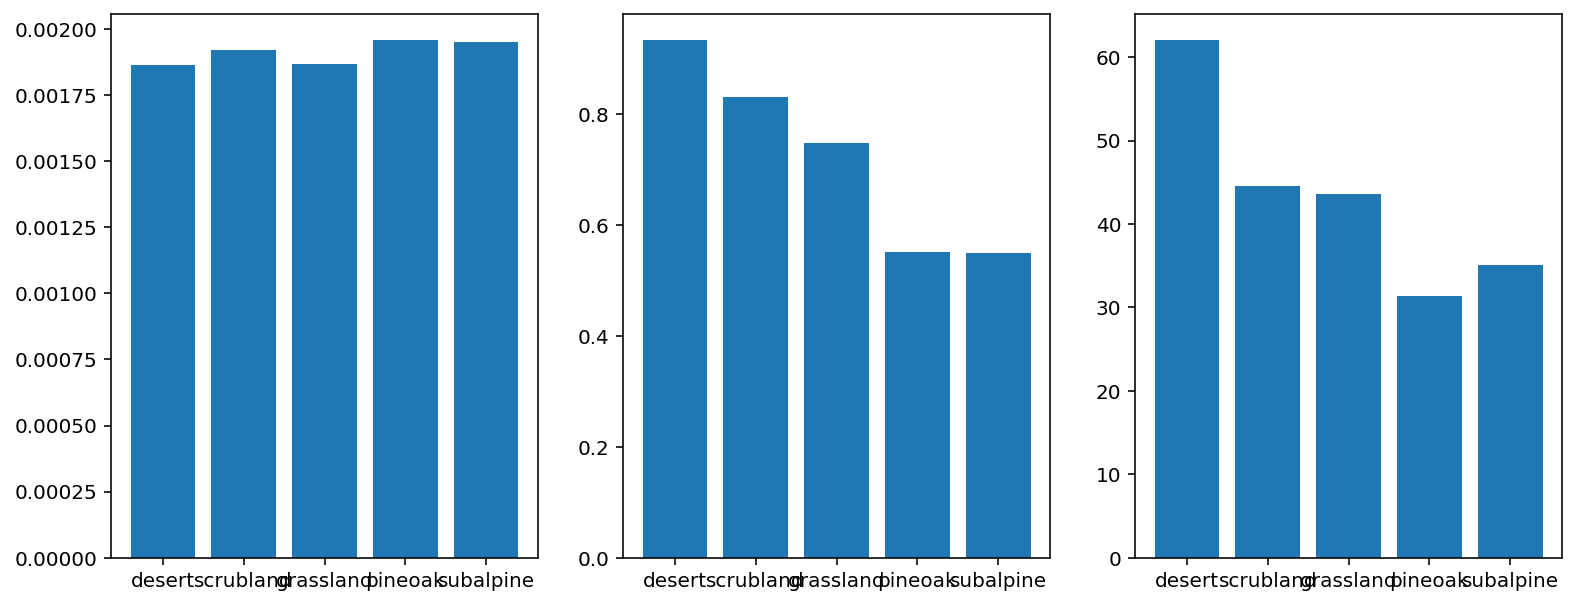

In [28]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))
#ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)
#ax.set_xlim(0.45,1.0)
#ax.set_ylim(0.0015,0.0035)
#ax.set_title('Day='+str(day))
#ax.set_xlabel('Drought Tolerance',size=14)
#ax.set_ylabel('Enzyme Investment',size=14)

ax1.bar(subalpine_enz.iloc[4*365,:].index,subalpine_enz.iloc[4*365,:])
ax2.bar(subalpine_drt.iloc[4*365,:].index,subalpine_drt.iloc[4*365,:])
ax3.bar(subalpine_decomp.iloc[5*365,:].index,subalpine_decomp.iloc[5*365,:])

plt.subplots_adjust(wspace=0.2)

plt.show()

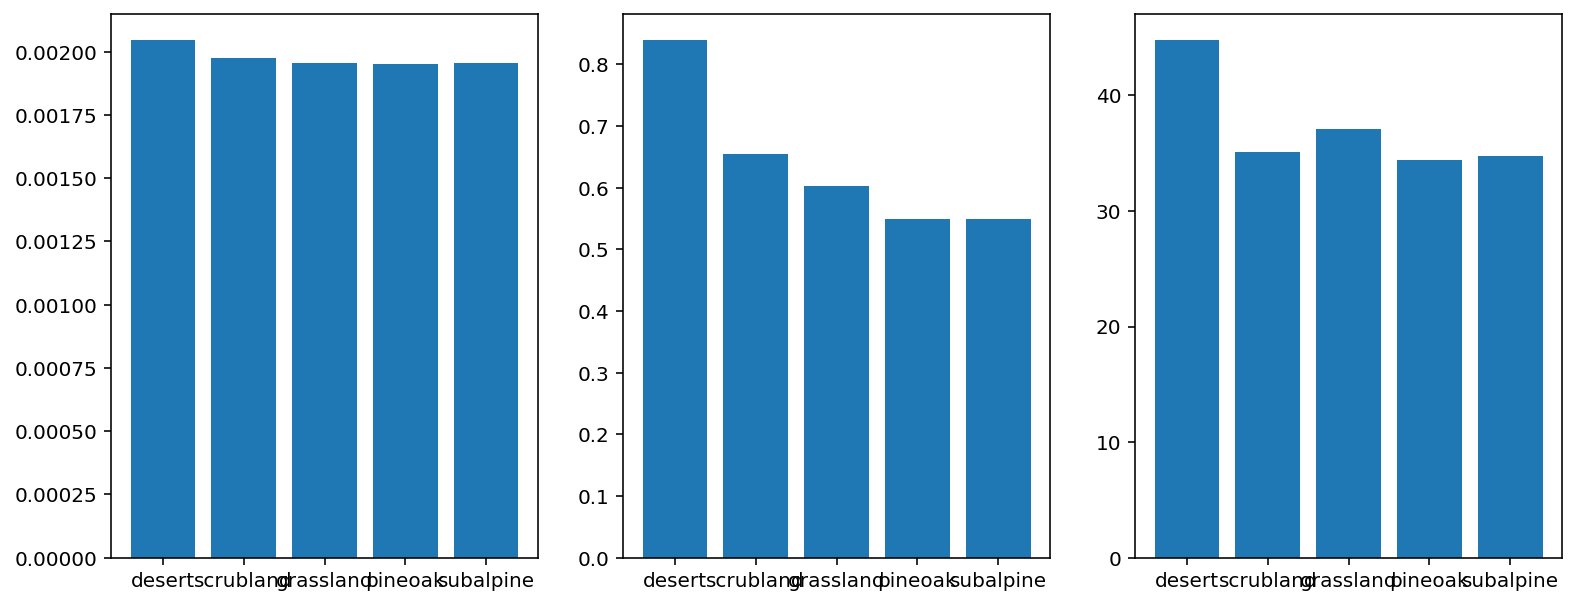

In [29]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))
#ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)
#ax.set_xlim(0.45,1.0)
#ax.set_ylim(0.0015,0.0035)
#ax.set_title('Day='+str(day))
#ax.set_xlabel('Drought Tolerance',size=14)
#ax.set_ylabel('Enzyme Investment',size=14)

ax1.bar(subalpine_enz.iloc[7*365,:].index,   subalpine_enz.iloc[7*365,:])
ax2.bar(subalpine_drt.iloc[7*365,:].index,   subalpine_drt.iloc[7*365,:])
ax3.bar(subalpine_decomp.iloc[8*365,:].index,subalpine_decomp.iloc[8*365,:])

plt.subplots_adjust(wspace=0.2)

plt.show()

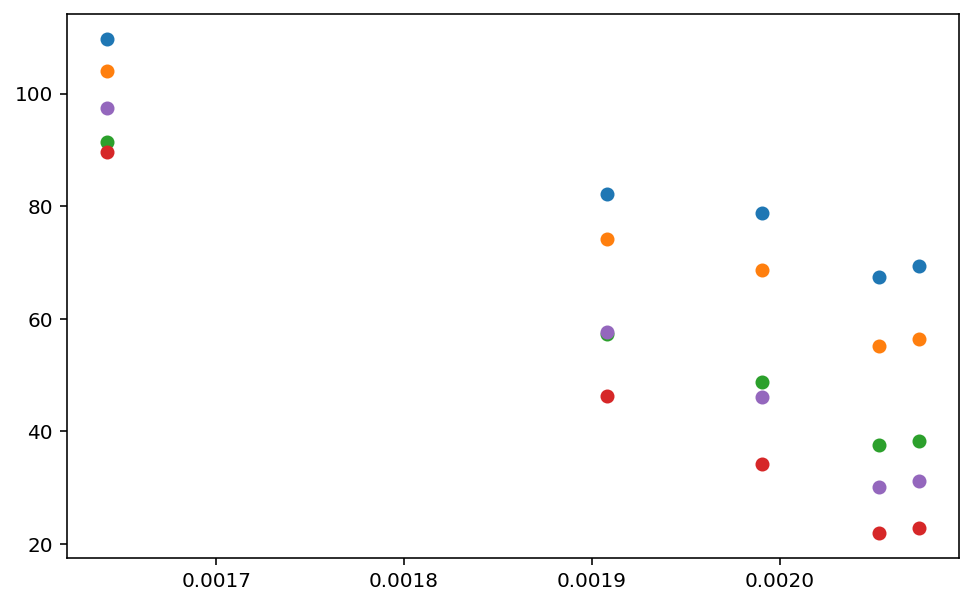

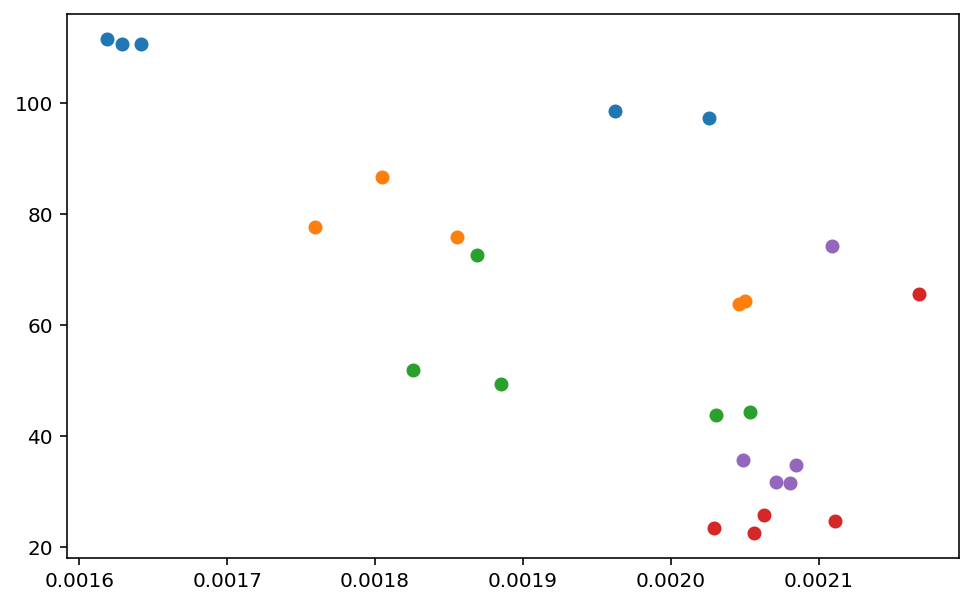

In [18]:
for year in [4,7]:

    fig,(ax1) = plt.subplots(1,1,figsize=(8,5))
    #ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)
    #ax.set_xlim(0.45,1.0)
    #ax.set_ylim(0.0015,0.0035)
    #ax.set_title('Day='+str(day))
    #ax.set_xlabel('Drought Tolerance',size=14)
    #ax.set_ylabel('Enzyme Investment',size=14)
    
#     ax1.scatter(desert_drt.iloc[year*365,:],      desert_decomp.iloc[(year+1)*365,:])
#     ax1.scatter(scrubland_drt.iloc[year*365,:],   scrubland_decomp.iloc[(year+1)*365,:])
#     ax1.scatter(grassland_drt.iloc[year*365,:],   grassland_decomp.iloc[(year+1)*365,:])
#     ax1.scatter(pineoak_drt.iloc[year*365,:],     pineoak_decomp.iloc[(year+1)*365,:])
#     ax1.scatter(subalpine_drt.iloc[year*365,:],   subalpine_decomp.iloc[(year+1)*365,:])
    
    ax1.scatter(desert_enz.iloc[year*365,:],      desert_decomp.iloc[(year+1)*365,:])
    ax1.scatter(scrubland_enz.iloc[year*365,:],   scrubland_decomp.iloc[(year+1)*365,:])
    ax1.scatter(grassland_enz.iloc[year*365,:],   grassland_decomp.iloc[(year+1)*365,:])
    ax1.scatter(pineoak_enz.iloc[year*365,:],     pineoak_decomp.iloc[(year+1)*365,:])
    ax1.scatter(subalpine_enz.iloc[year*365,:],   subalpine_decomp.iloc[(year+1)*365,:])
    
    #plt.subplots_adjust(wspace=0.2)

    plt.show()